# Proyecto de Diplomado en Ciencia de datos

<b>Proyecto:</b> Analisis y prediccion de estudiantes reprobados en la Unidad Educativa San Jose Obrero

<b>Estudiante:</b> Limberg Villca Coraite

<b>Carrera:</b> Lic.Ingenieria de Sistemas

## <b>Fase 1: </b>Comprension del Negocio (problema)

Analizar las calificaciones de los estudiantes, determinar las materias que tienen mayor falencia y predecir que estudiantes tienen la mayor probabilidad de reprobar

## <b> Fase 2: </b> Comprension de los Datos

### Recolectar, consolidar y preprocesar datos históricos desde el año 2015 al 2024

In [1]:
import os

ruta_local = "L:/Materiales cursos y diplomados/datascience/Notas San Jose Obrero/Proyecto-Dip.-Ciencia-de-datos/data-source"
ruta_repo = "https://github.com/LimbergVillcaCoraite/Proyecto-Dip.-Ciencia-de-datos.git"
nombre_carpeta_repo = "Proyecto-Dip.-Ciencia-de-datos"

if os.path.exists(ruta_local):
    print("Usando ruta local:", ruta_local)
    os.chdir("L:/Materiales cursos y diplomados/datascience/Notas San Jose Obrero/Proyecto-Dip.-Ciencia-de-datos/data-source")
    print("Directorio de trabajo: " + os.getcwd())
elif os.path.exists(nombre_carpeta_repo):
    print(f"Se encontró la carpeta del repositorio clonado previamente: {nombre_carpeta_repo}")
    os.chdir("/content/Proyecto-Dip.-Ciencia-de-datos/data-source")
    print("Directorio de trabajo: " + os.getcwd())
else:
    try:
        print("La ruta local no existe. Clonando desde el repositorio remoto...")
        !git clone {ruta_repo}
        print("Repositorio clonado exitosamente.")
        os.chdir("/content/Proyecto-Dip.-Ciencia-de-datos/data-source")
        print("Directorio de trabajo: " + os.getcwd())
    except Exception as e:
        print(f"Ocurrió un error al intentar clonar el repositorio: {e}")

Usando ruta local: L:/Materiales cursos y diplomados/datascience/Notas San Jose Obrero/Proyecto-Dip.-Ciencia-de-datos/data-source
Directorio de trabajo: L:\Materiales cursos y diplomados\datascience\Notas San Jose Obrero\Proyecto-Dip.-Ciencia-de-datos\data-source


In [2]:
# importando librerias
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

#### Recolectar y consolidar datos históricos



In [3]:
def merge_excel_files(folder_paths, output_file):
    """
    Une archivos Excel de múltiples carpetas en un solo DataFrame.

    Parámetros:
        folder_paths (list): Lista de rutas de las carpetas con los archivos .xlsx.
        output_file (str): Ruta donde se guardará el archivo combinado.
    """
    dfs = []  # Lista para almacenar los DataFrames

    # Recorrer cada carpeta individualmente
    for folder_path in folder_paths:
        if not isinstance(folder_path, str):  # Verificar que la ruta es válida
            print(f"❌ Error: '{folder_path}' no es una ruta válida.")
            continue

        if not os.path.exists(folder_path):  # Verificar si la carpeta existe
            print(f"⚠️ Advertencia: La carpeta '{folder_path}' no existe. Se omitirá.")
            continue

        # Obtener lista de archivos .xlsx en la carpeta
        file_list = [f for f in os.listdir(folder_path) if f.endswith(".xlsx")]

        for file in file_list:
            file_path = os.path.join(folder_path, file)
            try:
                df = pd.read_excel(file_path, engine='openpyxl')  # Leer archivo Excel, especificando el engine
                print(f"Leyendo archivo: {file_path}") # Para verificar qué archivo se está leyendo

                # Extraer el año del nombre del archivo
                try:
                    df["Año"] = file.split("-")[1].split(".")[0] # Asegurarse de quitar la extensión
                except IndexError:
                    df["Año"] = "Desconocido"
                    print(f"⚠️ No se pudo extraer el año de '{file}'. Se asignará 'Desconocido'.")

                # Agregar la carpeta de origen como columna (opcional)
                df["Origen"] = os.path.basename(folder_path)

                dfs.append(df)  # Agregar DataFrame a la lista
            except ValueError as ve:
                print(f"❌ Error al leer el archivo '{file_path}': {ve}")
                print("   Asegúrate de que sea un archivo Excel válido (.xlsx) o considera especificar el 'engine' correcto (ej., 'xlrd' para .xls).")
            except Exception as e:
                print(f"❌ Error inesperado al procesar el archivo '{file_path}': {e}")

    # Verificar si hay archivos para combinar
    if not dfs:
        print("❌ No se encontraron archivos para combinar. Verifica las rutas y los archivos .xlsx.")
        return None  # Retorna None para evitar otros errores

    # Concatenar todos los DataFrames
    merged_df = pd.concat(dfs, ignore_index=True)

    # Guardar el resultado en un archivo Excel
    try:
        merged_df.to_excel(output_file, index=False)
        print(f"✅ Merge completado. Archivo guardado en: {output_file}")
    except Exception as e:
        print(f"❌ Error al guardar el archivo: {e}")

    return merged_df

In [4]:
os.getcwd()

'L:\\Materiales cursos y diplomados\\datascience\\Notas San Jose Obrero\\Proyecto-Dip.-Ciencia-de-datos\\data-source'

In [5]:
# Definir las carpetas de origen
folder_paths = [
    "Notas Primaria",
    "Notas Secundaria"
]

In [6]:
# Definir la ruta de salida antes de llamar la función
output_file = "./Salidas del programa/merged_dataset.xlsx"


## <b> Fase 3: </b> Preparacion de los Datos

### Recolectar, consolidar y preprocesar datos históricos desde el año 2015 al 2024

#### Preprocesamiento y limpieza de datos

In [7]:
# Ejecutar la función
merged_df = merge_excel_files(folder_paths, output_file)

Leyendo archivo: Notas Primaria\dataset_notas_san_jose_obrero-2015-primaria.xlsx
Leyendo archivo: Notas Primaria\dataset_notas_san_jose_obrero-2016-primaria.xlsx
Leyendo archivo: Notas Primaria\dataset_notas_san_jose_obrero-2017-primaria.xlsx
Leyendo archivo: Notas Primaria\dataset_notas_san_jose_obrero-2018-primaria.xlsx
Leyendo archivo: Notas Primaria\dataset_notas_san_jose_obrero-2019-primaria.xlsx
Leyendo archivo: Notas Primaria\dataset_notas_san_jose_obrero-2020-primaria.xlsx
Leyendo archivo: Notas Primaria\dataset_notas_san_jose_obrero-2021-primaria.xlsx
Leyendo archivo: Notas Primaria\dataset_notas_san_jose_obrero-2022-primaria.xlsx
Leyendo archivo: Notas Primaria\dataset_notas_san_jose_obrero-2023-primaria.xlsx
Leyendo archivo: Notas Primaria\dataset_notas_san_jose_obrero-2024-primaria.xlsx
Leyendo archivo: Notas Secundaria\dataset_notas_san_jose_obrero-2015-secundaria.xlsx
Leyendo archivo: Notas Secundaria\dataset_notas_san_jose_obrero-2016-secundaria.xlsx
Leyendo archivo: Not

In [8]:
if merged_df is not None:
    print(merged_df.head())

   Gestion     Nivel  Curso A. Paterno A. Materno          Nombres  \
0   2015.0  Primario  1ro A    AGUILAR     SURUBI  DAYANE PRISCILA   
1   2015.0  Primario  1ro A    BANEGAS     BLANCO      JUAN DANIEL   
2   2015.0  Primario  1ro A    BARRERO      ROJAS       LUIS DEIVY   
3   2015.0  Primario  1ro A   BECKMANN     MAMANI           ANDRES   
4   2015.0  Primario  1ro A   BEJARANO    CONDORI          ADRIANA   

        Codigo Rude Genero Fecha Nac. Lug. Nac  ... T. General/Esp Fisica  \
0  8196001120142086      F 2009-05-12       SC  ...           71.0    NaN   
1  5195000120142681      M 2008-11-24       SC  ...           58.0    NaN   
2  5195000120142734      M 2009-03-06       SC  ...           76.0    NaN   
3  8098050820131175      M 2008-11-13      CBB  ...           81.0    NaN   
4   719500632014275      F 2008-12-28       SC  ...           75.0    NaN   

   Quimica  Bio./C.Nat  Cosmov y  Val. Esp. Rel  Psicologia   Promedio   Año  \
0      NaN        75.0       NaN    

In [9]:
# Cargar el archivo Excel mergeado
file_path = "./Salidas del programa/merged_dataset.xlsx"

In [10]:
# Leer el archivo Excel
df = pd.read_excel(file_path)

#### Contando la cantidad de filas y columnas

In [11]:
# Obtener el número de filas y columnas
num_filas, num_columnas = df.shape
print(f" El archivo tiene {num_filas} filas y {num_columnas} columnas.")
df1 = df

 El archivo tiene 2978 filas y 31 columnas.


#### Verificacion de valores nulos

In [12]:
# Buscando valores null
df.isnull().sum()

Gestion                 20
Nivel                   20
Curso                   20
A. Paterno              50
A. Materno              20
Nombres                 20
Codigo Rude             20
Genero                  20
Fecha Nac.              20
Lug. Nac                48
Numero CI              157
Estado Matricula        20
Com. Lenguaje          335
L. Extrangera         1812
Ed. Civica            2939
Geografia             2939
Cs. Sociales/Hist      337
Edu. Musical           337
Art. Plasticas. V.     337
E. Fisica. D.          337
Matematica             337
T. General/Esp         430
Fisica                2294
Quimica               2515
Bio./C.Nat             337
Cosmov y              1867
Val. Esp. Rel          337
Psicologia            2925
Promedio               337
Año                      0
Origen                   0
dtype: int64

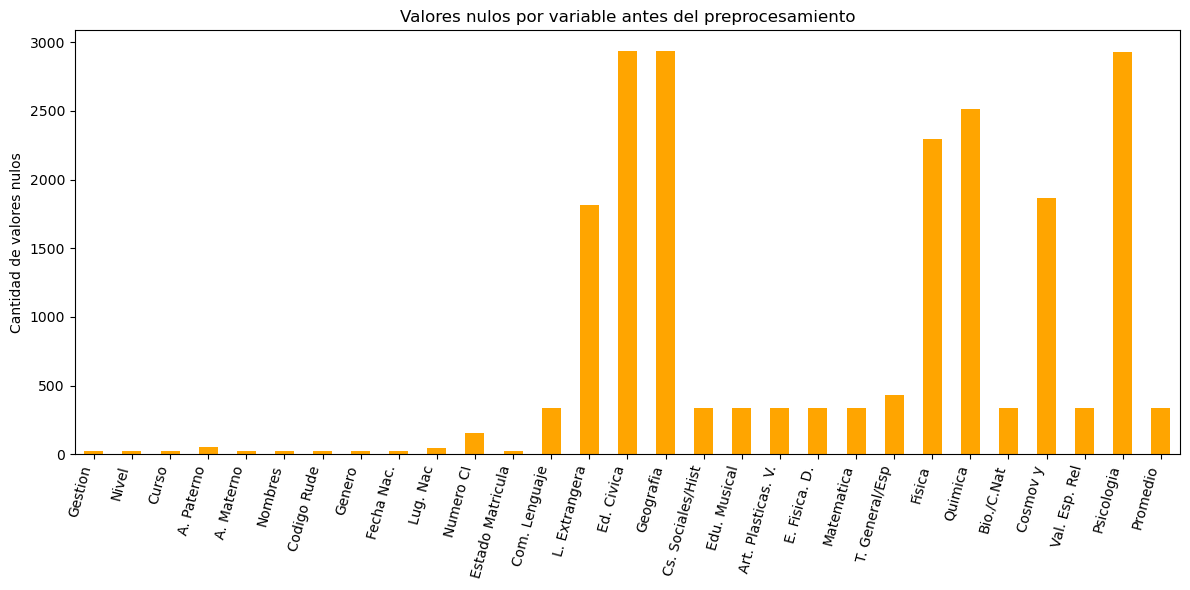

In [13]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar', color='orange')
plt.title("Valores nulos por variable antes del preprocesamiento")
plt.ylabel("Cantidad de valores nulos")
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

#### Borrando los valores nulos y duplicados

In [14]:
df.head()

,Gestion,Nivel,Curso,A. Paterno,A. Materno,Nombres,Codigo Rude,Genero,Fecha Nac.,Lug. Nac,...,T. General/Esp,Fisica,Quimica,Bio./C.Nat,Cosmov y,Val. Esp. Rel,Psicologia,Promedio,Año,Origen
0,2015.0,Primario,1ro A,AGUILAR,SURUBI,DAYANE PRISCILA,8196001120142086,F,2009-05-12,SC,...,71.0,NaN,NaN,75.0,NaN,79.0,NaN,78.111111,2015,Notas Primaria
1,2015.0,Primario,1ro A,BANEGAS,BLANCO,JUAN DANIEL,5195000120142681,M,2008-11-24,SC,...,58.0,NaN,NaN,57.0,NaN,52.0,NaN,60.555556,2015,Notas Primaria
2,2015.0,Primario,1ro A,BARRERO,ROJAS,LUIS DEIVY,5195000120142734,M,2009-03-06,SC,...,76.0,NaN,NaN,72.0,NaN,65.0,NaN,76.888889,2015,Notas Primaria
3,2015.0,Primario,1ro A,BECKMANN,MAMANI,ANDRES,8098050820131175,M,2008-11-13,CBB,...,81.0,NaN,NaN,86.0,NaN,89.0,NaN,86.111111,2015,Notas Primaria
4,2015.0,Primario,1ro A,BEJARANO,CONDORI,ADRIANA,719500632014275,F,2008-12-28,SC,...,75.0,NaN,NaN,79.0,NaN,75.0,NaN,77.222222,2015,Notas Primaria


In [15]:
df = df.drop(columns=["Año", "Origen"])

In [16]:
filas_gestion_nula = df[df['Gestion'].isna()]
filas_gestion_nula

,Gestion,Nivel,Curso,A. Paterno,A. Materno,Nombres,Codigo Rude,Genero,Fecha Nac.,Lug. Nac,...,E. Fisica. D.,Matematica,T. General/Esp,Fisica,Quimica,Bio./C.Nat,Cosmov y,Val. Esp. Rel,Psicologia,Promedio
2124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df = df.dropna(subset=['Gestion'])

In [18]:
# Buscando valores null
df.isnull().sum()

Gestion                  0
Nivel                    0
Curso                    0
A. Paterno              30
A. Materno               0
Nombres                  0
Codigo Rude              0
Genero                   0
Fecha Nac.               0
Lug. Nac                28
Numero CI              137
Estado Matricula         0
Com. Lenguaje          315
L. Extrangera         1792
Ed. Civica            2919
Geografia             2919
Cs. Sociales/Hist      317
Edu. Musical           317
Art. Plasticas. V.     317
E. Fisica. D.          317
Matematica             317
T. General/Esp         410
Fisica                2274
Quimica               2495
Bio./C.Nat             317
Cosmov y              1847
Val. Esp. Rel          317
Psicologia            2905
Promedio               317
dtype: int64

In [19]:
df = df.dropna(how='all')

In [20]:
# Buscando valores duplicados
df.duplicated().sum()

0

In [21]:
df.head()

,Gestion,Nivel,Curso,A. Paterno,A. Materno,Nombres,Codigo Rude,Genero,Fecha Nac.,Lug. Nac,...,E. Fisica. D.,Matematica,T. General/Esp,Fisica,Quimica,Bio./C.Nat,Cosmov y,Val. Esp. Rel,Psicologia,Promedio
0,2015.0,Primario,1ro A,AGUILAR,SURUBI,DAYANE PRISCILA,8196001120142086,F,2009-05-12,SC,...,92.0,77.0,71.0,NaN,NaN,75.0,NaN,79.0,NaN,78.111111
1,2015.0,Primario,1ro A,BANEGAS,BLANCO,JUAN DANIEL,5195000120142681,M,2008-11-24,SC,...,87.0,57.0,58.0,NaN,NaN,57.0,NaN,52.0,NaN,60.555556
2,2015.0,Primario,1ro A,BARRERO,ROJAS,LUIS DEIVY,5195000120142734,M,2009-03-06,SC,...,88.0,71.0,76.0,NaN,NaN,72.0,NaN,65.0,NaN,76.888889
3,2015.0,Primario,1ro A,BECKMANN,MAMANI,ANDRES,8098050820131175,M,2008-11-13,CBB,...,91.0,85.0,81.0,NaN,NaN,86.0,NaN,89.0,NaN,86.111111
4,2015.0,Primario,1ro A,BEJARANO,CONDORI,ADRIANA,719500632014275,F,2008-12-28,SC,...,92.0,69.0,75.0,NaN,NaN,79.0,NaN,75.0,NaN,77.222222


#### Tratamiento de columnas categóricas y numéricas

In [22]:
# Rellenar columnas categóricas con 'Desconocido'
categorical_cols = ["A. Paterno", "Lug. Nac"]
df[categorical_cols] = df[categorical_cols].fillna("Desconocido")

In [23]:
# Rellenar notas con 0
notas_cols = ["Com. Lenguaje", "L. Extrangera", "Ed. Civica", "Geografia", "Cs. Sociales/Hist", "Edu. Musical"
              , "Art. Plasticas. V.", "E. Fisica. D." , "Matematica", "T. General/Esp", "Fisica", "Quimica"
              , "Bio./C.Nat", "Cosmov y", "Val. Esp. Rel", "Psicologia", "Promedio"]
df[notas_cols] = df[notas_cols].fillna(0)

In [24]:
df.head()

,Gestion,Nivel,Curso,A. Paterno,A. Materno,Nombres,Codigo Rude,Genero,Fecha Nac.,Lug. Nac,...,E. Fisica. D.,Matematica,T. General/Esp,Fisica,Quimica,Bio./C.Nat,Cosmov y,Val. Esp. Rel,Psicologia,Promedio
0,2015.0,Primario,1ro A,AGUILAR,SURUBI,DAYANE PRISCILA,8196001120142086,F,2009-05-12,SC,...,92.0,77.0,71.0,0.0,0.0,75.0,0.0,79.0,0.0,78.111111
1,2015.0,Primario,1ro A,BANEGAS,BLANCO,JUAN DANIEL,5195000120142681,M,2008-11-24,SC,...,87.0,57.0,58.0,0.0,0.0,57.0,0.0,52.0,0.0,60.555556
2,2015.0,Primario,1ro A,BARRERO,ROJAS,LUIS DEIVY,5195000120142734,M,2009-03-06,SC,...,88.0,71.0,76.0,0.0,0.0,72.0,0.0,65.0,0.0,76.888889
3,2015.0,Primario,1ro A,BECKMANN,MAMANI,ANDRES,8098050820131175,M,2008-11-13,CBB,...,91.0,85.0,81.0,0.0,0.0,86.0,0.0,89.0,0.0,86.111111
4,2015.0,Primario,1ro A,BEJARANO,CONDORI,ADRIANA,719500632014275,F,2008-12-28,SC,...,92.0,69.0,75.0,0.0,0.0,79.0,0.0,75.0,0.0,77.222222


#### Tratamiento de valores nulos en la columna Numero CI

In [25]:
# Rellenar columnas categóricas con 'Desconocido'
categorical_cols = ["Numero CI"]
df[categorical_cols] = df[categorical_cols].fillna("N/A")

In [26]:
# Buscando valores null
df.isnull().sum()

Gestion               0
Nivel                 0
Curso                 0
A. Paterno            0
A. Materno            0
Nombres               0
Codigo Rude           0
Genero                0
Fecha Nac.            0
Lug. Nac              0
Numero CI             0
Estado Matricula      0
Com. Lenguaje         0
L. Extrangera         0
Ed. Civica            0
Geografia             0
Cs. Sociales/Hist     0
Edu. Musical          0
Art. Plasticas. V.    0
E. Fisica. D.         0
Matematica            0
T. General/Esp        0
Fisica                0
Quimica               0
Bio./C.Nat            0
Cosmov y              0
Val. Esp. Rel         0
Psicologia            0
Promedio              0
dtype: int64

#### Cambio de tipo de dato a Fecha de nacimiento

In [27]:
df["Fecha Nac."] = pd.to_datetime(df["Fecha Nac."], errors='coerce')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2958 entries, 0 to 2977
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Gestion             2958 non-null   float64       
 1   Nivel               2958 non-null   object        
 2   Curso               2958 non-null   object        
 3   A. Paterno          2958 non-null   object        
 4   A. Materno          2958 non-null   object        
 5   Nombres             2958 non-null   object        
 6   Codigo Rude         2958 non-null   object        
 7   Genero              2958 non-null   object        
 8   Fecha Nac.          2958 non-null   datetime64[ns]
 9   Lug. Nac            2958 non-null   object        
 10  Numero CI           2958 non-null   object        
 11  Estado Matricula    2958 non-null   object        
 12  Com. Lenguaje       2958 non-null   float64       
 13  L. Extrangera       2958 non-null   float64       
 1

#### Separando los datos personales y calificaciones

In [29]:
datos_personales = ["A. Paterno", "A. Materno", "Nombres",
                    "Codigo Rude", "Genero", "Fecha Nac.", "Lug. Nac", "Numero CI"]


In [30]:
calificaciones = ["Codigo Rude", "Nivel", "Curso", "Estado Matricula", "Gestion", "Com. Lenguaje", "L. Extrangera", "Ed. Civica",
                  "Geografia", "Cs. Sociales/Hist", "Edu. Musical", "Art. Plasticas. V.", "E. Fisica. D.", "Matematica",
                  "T. General/Esp", "Fisica", "Quimica", "Bio./C.Nat", "Cosmov y", "Val. Esp. Rel", "Psicologia", "Promedio"]

df["Codigo Rude"] = df["Codigo Rude"].astype(str)  # Mantener como texto
df[calificaciones[4:]] = df[calificaciones[4:]].fillna(0).astype(int)  # Convertir calificaciones a entero

In [31]:
df[calificaciones].head()

,Codigo Rude,Nivel,Curso,Estado Matricula,Gestion,Com. Lenguaje,L. Extrangera,Ed. Civica,Geografia,Cs. Sociales/Hist,...,E. Fisica. D.,Matematica,T. General/Esp,Fisica,Quimica,Bio./C.Nat,Cosmov y,Val. Esp. Rel,Psicologia,Promedio
0,8196001120142086,Primario,1ro A,PROMOVIDO,2015,75,0,0,0,79,...,92,77,71,0,0,75,0,79,0,78
1,5195000120142681,Primario,1ro A,PROMOVIDO,2015,57,0,0,0,57,...,87,57,58,0,0,57,0,52,0,60
2,5195000120142734,Primario,1ro A,PROMOVIDO,2015,77,0,0,0,73,...,88,71,76,0,0,72,0,65,0,76
3,8098050820131175,Primario,1ro A,PROMOVIDO,2015,81,0,0,0,84,...,91,85,81,0,0,86,0,89,0,86
4,719500632014275,Primario,1ro A,PROMOVIDO,2015,71,0,0,0,71,...,92,69,75,0,0,79,0,75,0,77


In [32]:
df[datos_personales].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2958 entries, 0 to 2977
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   A. Paterno   2958 non-null   object        
 1   A. Materno   2958 non-null   object        
 2   Nombres      2958 non-null   object        
 3   Codigo Rude  2958 non-null   object        
 4   Genero       2958 non-null   object        
 5   Fecha Nac.   2958 non-null   datetime64[ns]
 6   Lug. Nac     2958 non-null   object        
 7   Numero CI    2958 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 208.0+ KB


#### Guardado datos personales y calificaciones en archivos separados

In [33]:
df[datos_personales].to_excel("./Salidas del programa/datos_personales.xlsx", index=True)
df[calificaciones].to_excel("./Salidas del programa/calificaciones.xlsx", index=True)

In [34]:
#!pip install ydata_profiling

In [35]:
#from ydata_profiling import ProfileReport

In [36]:
#profile = ProfileReport(df, title="Profiling Report")

In [37]:
#profile

Ya con valores indicados para la analitica de datos, este apartado se procede a realizar en tableau public, aunque se realiza un analisis basico en el final de esta seccion

#### Quitando a estudiantes con promedio = 0

Se quitan a estudiantes con promedio = 0, ya que estos ya no se encuentran estudiando en la U.E. Por lo cual no tendra caso predecir si estos reprobaran (este estudio se centra en la unidad educativa y no asi en otra), desde otro punto de vista, si re cambia este promedio de 0 a otro valor como la media o mediana entonces significara que el estudiante aun continua en la U.E, el sistema de educacion regular indica que solo una unidad edicativa puede subir las notas del estudiante

In [38]:
df = df[df['Promedio'] != 0]

In [39]:
df.head()

,Gestion,Nivel,Curso,A. Paterno,A. Materno,Nombres,Codigo Rude,Genero,Fecha Nac.,Lug. Nac,...,E. Fisica. D.,Matematica,T. General/Esp,Fisica,Quimica,Bio./C.Nat,Cosmov y,Val. Esp. Rel,Psicologia,Promedio
0,2015,Primario,1ro A,AGUILAR,SURUBI,DAYANE PRISCILA,8196001120142086,F,2009-05-12,SC,...,92,77,71,0,0,75,0,79,0,78
1,2015,Primario,1ro A,BANEGAS,BLANCO,JUAN DANIEL,5195000120142681,M,2008-11-24,SC,...,87,57,58,0,0,57,0,52,0,60
2,2015,Primario,1ro A,BARRERO,ROJAS,LUIS DEIVY,5195000120142734,M,2009-03-06,SC,...,88,71,76,0,0,72,0,65,0,76
3,2015,Primario,1ro A,BECKMANN,MAMANI,ANDRES,8098050820131175,M,2008-11-13,CBB,...,91,85,81,0,0,86,0,89,0,86
4,2015,Primario,1ro A,BEJARANO,CONDORI,ADRIANA,719500632014275,F,2008-12-28,SC,...,92,69,75,0,0,79,0,75,0,77


#### Convirtiendo la gestion a tipo de dato entero

In [40]:
df["Gestion"] = df["Gestion"].astype(int)

In [41]:
#df["Gestion"] = pd.to_datetime(df["Gestion"]).dt.year

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2641 entries, 0 to 2977
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Gestion             2641 non-null   int32         
 1   Nivel               2641 non-null   object        
 2   Curso               2641 non-null   object        
 3   A. Paterno          2641 non-null   object        
 4   A. Materno          2641 non-null   object        
 5   Nombres             2641 non-null   object        
 6   Codigo Rude         2641 non-null   object        
 7   Genero              2641 non-null   object        
 8   Fecha Nac.          2641 non-null   datetime64[ns]
 9   Lug. Nac            2641 non-null   object        
 10  Numero CI           2641 non-null   object        
 11  Estado Matricula    2641 non-null   object        
 12  Com. Lenguaje       2641 non-null   int32         
 13  L. Extrangera       2641 non-null   int32         
 1

### Analizar la evolución del rendimiento académico de los estudiantes

Este objetivo especifivo será mas visto en tableau, pero en jupyter se realizará un análisis básico

#### Contando la cantidad de reprobados por año

In [43]:
df["Reprobado"] = df["Estado Matricula"].str.contains("REPROBADO", case=False).astype(int)

In [44]:
cantidad_reprobados_por_anio = df.groupby("Gestion")["Reprobado"].sum()
print("Cantidad de estudiantes reprobados por año")
print(cantidad_reprobados_por_anio)

Cantidad de estudiantes reprobados por año
Gestion
2015     6
2016     4
2017    20
2018    22
2019     6
2020     0
2021    27
2022    17
2023    30
2024    31
Name: Reprobado, dtype: int32


##### Correlaciones numericas

#### Analisis basico

In [45]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 7) # Tamaño de figura por defecto

##### Estadisticas descriptivas

In [46]:
print("--- Estadísticas Descriptivas (Variables Numéricas) ---")
# Muestra estadísticas como media, std, min, max, cuartiles para columnas numéricas
print(df.describe())
print("-" * 50)

--- Estadísticas Descriptivas (Variables Numéricas) ---
           Gestion                     Fecha Nac.  Com. Lenguaje  \
count  2641.000000                           2641    2641.000000   
mean   2019.644832  2008-03-24 17:53:35.600151296      66.925407   
min    2015.000000            1995-03-18 00:00:00      35.000000   
25%    2017.000000            2004-12-08 00:00:00      57.000000   
50%    2020.000000            2008-04-02 00:00:00      66.000000   
75%    2022.000000            2011-11-24 00:00:00      76.000000   
max    2024.000000            2018-06-23 00:00:00      98.000000   
std       2.854479                            NaN      12.636262   

       L. Extrangera   Ed. Civica    Geografia  Cs. Sociales/Hist  \
count    2641.000000  2641.000000  2641.000000        2641.000000   
mean       30.888300     1.062476     1.054903          69.783415   
min         0.000000     0.000000     0.000000           0.000000   
25%         0.000000     0.000000     0.000000         

##### Analisis univariado

###### <b>Grafica: </b>Distribucion del promedio de los estudiantes

--- Distribuciones Numéricas ---


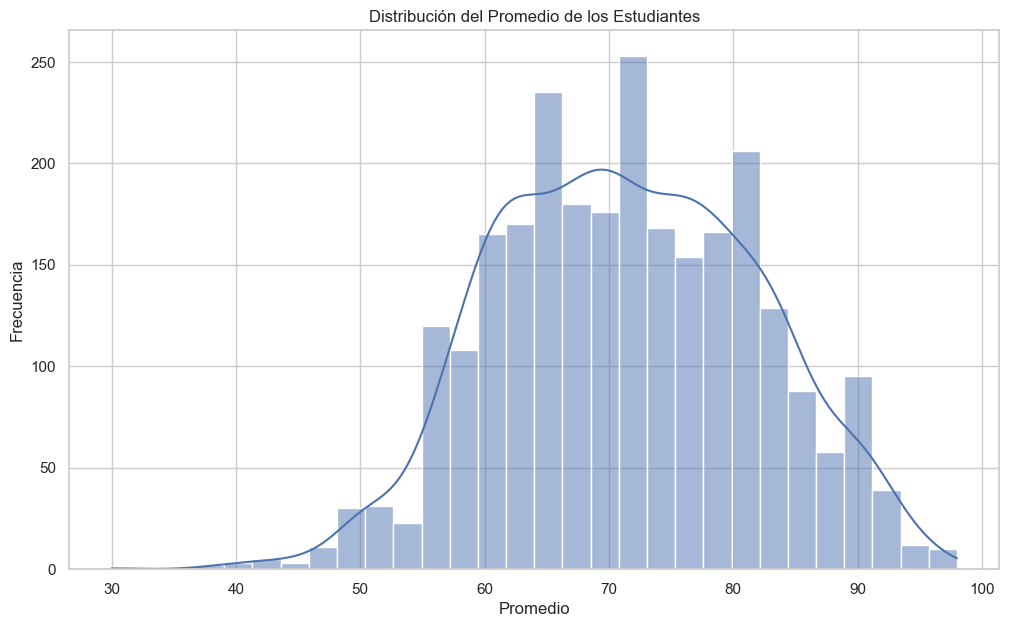

In [47]:
# --- Análisis Univariado (Distribución de variables individuales) ---
print("--- Distribuciones Numéricas ---")

# Distribución del Promedio
plt.figure()
sns.histplot(df['Promedio'], kde=True, bins=30)
plt.title('Distribución del Promedio de los Estudiantes')
plt.xlabel('Promedio')
plt.ylabel('Frecuencia')
plt.show()

###### <b>Grafica: <b/> Distribucion de calificaciones por materias

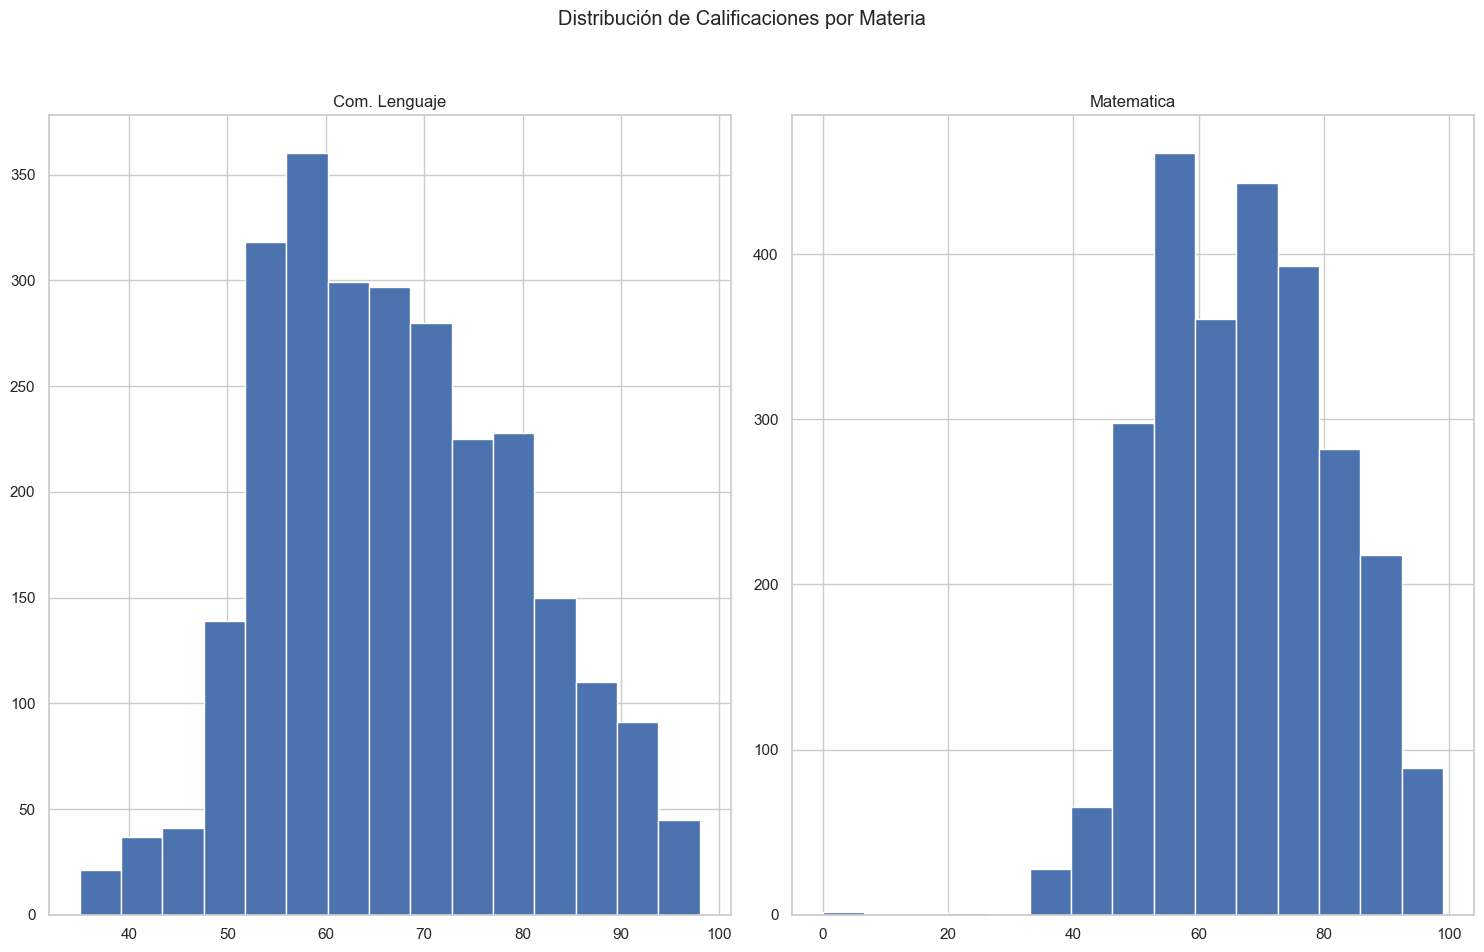

In [48]:
# Distribución de calificaciones individuales
subject_cols = ["Com. Lenguaje", "Matematica"]
df[subject_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribución de Calificaciones por Materia')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

###### <b> Grafica: </b> Distribucion de reprobados


--- Distribuciones Categóricas ---


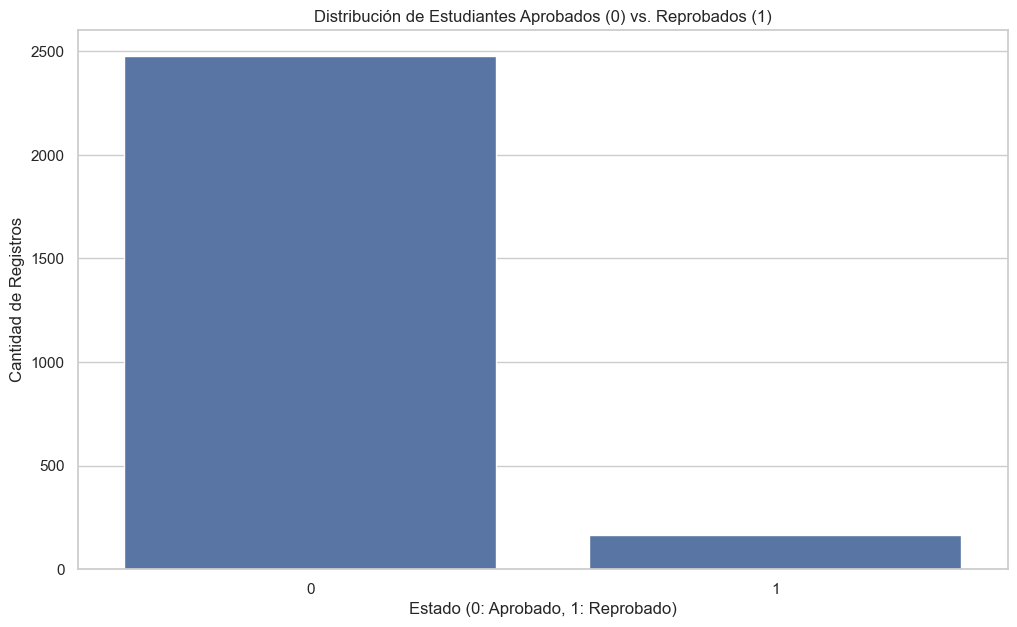

Value Counts de Reprobado:
Reprobado
0    93.828095
1     6.171905
Name: proportion, dtype: float64%


In [49]:
print("\n--- Distribuciones Categóricas ---")

# Distribución de la variable objetivo 'Reprobado'
plt.figure()
sns.countplot(data=df, x='Reprobado')
plt.title('Distribución de Estudiantes Aprobados (0) vs. Reprobados (1)')
plt.xlabel('Estado (0: Aprobado, 1: Reprobado)')
plt.ylabel('Cantidad de Registros')
plt.show()
print(f"Value Counts de Reprobado:\n{df['Reprobado'].value_counts(normalize=True) * 100}%") # Porcentaje

###### <b>Grafica: </b> Distribucion de cantidad de estudiantes por genero

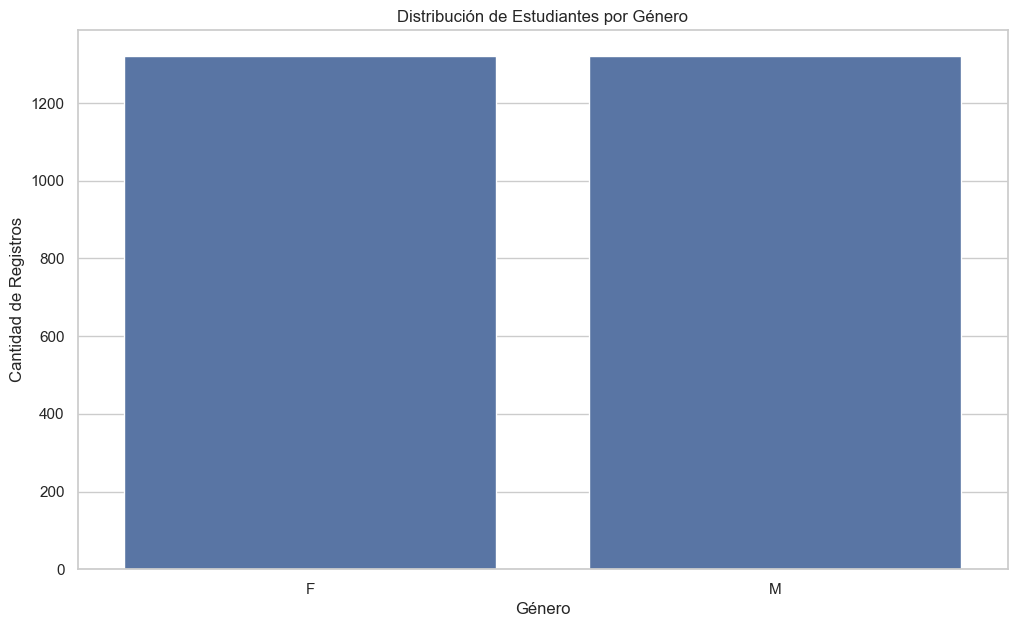


Value Counts de Genero:
Genero
M    1321
F    1320
Name: count, dtype: int64


In [50]:
# Distribución por Género
if 'Genero' in df.columns:
    plt.figure()
    sns.countplot(data=df, x='Genero')
    plt.title('Distribución de Estudiantes por Género')
    plt.xlabel('Género')
    plt.ylabel('Cantidad de Registros')
    plt.show()
    print(f"\nValue Counts de Genero:\n{df['Genero'].value_counts()}")

###### <b>Grafica: </b> Distribucion de estudiantes por nivel educativo

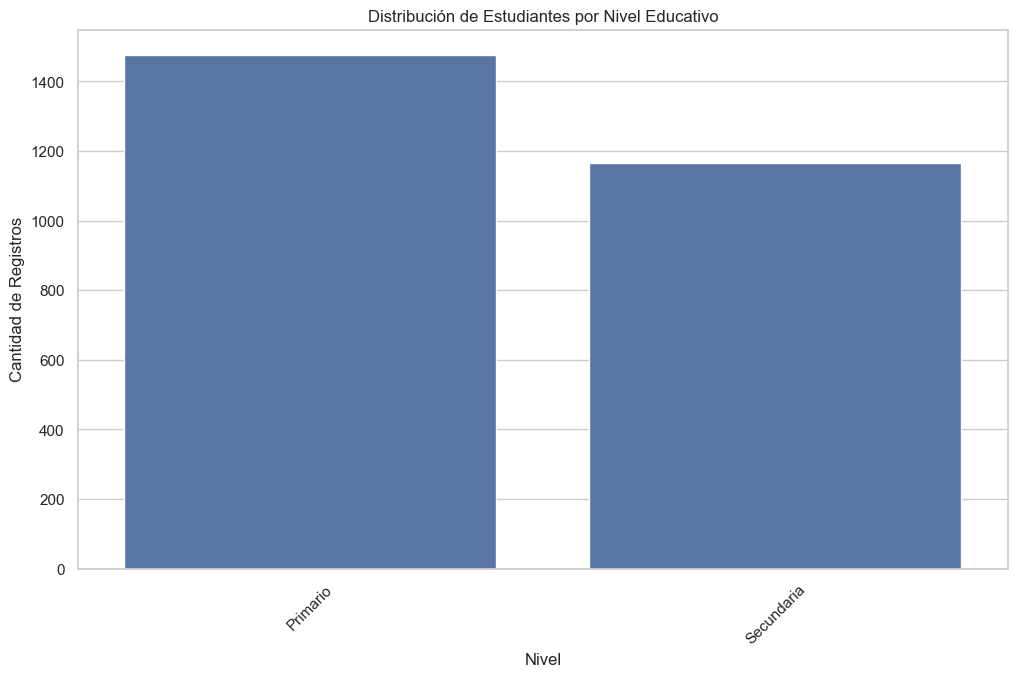


Value Counts de Nivel:
Nivel
Primario      1475
Secundaria    1166
Name: count, dtype: int64


In [51]:
# Distribución por Nivel
if 'Nivel' in df.columns:
    plt.figure()
    sns.countplot(data=df, x='Nivel', order=df['Nivel'].value_counts().index) # Ordenar por frecuencia
    plt.title('Distribución de Estudiantes por Nivel Educativo')
    plt.xlabel('Nivel')
    plt.ylabel('Cantidad de Registros')
    plt.xticks(rotation=45)
    plt.show()
    print(f"\nValue Counts de Nivel:\n{df['Nivel'].value_counts()}")

###### <b>Grafica: </b> Distribucion de estudiantes por curso

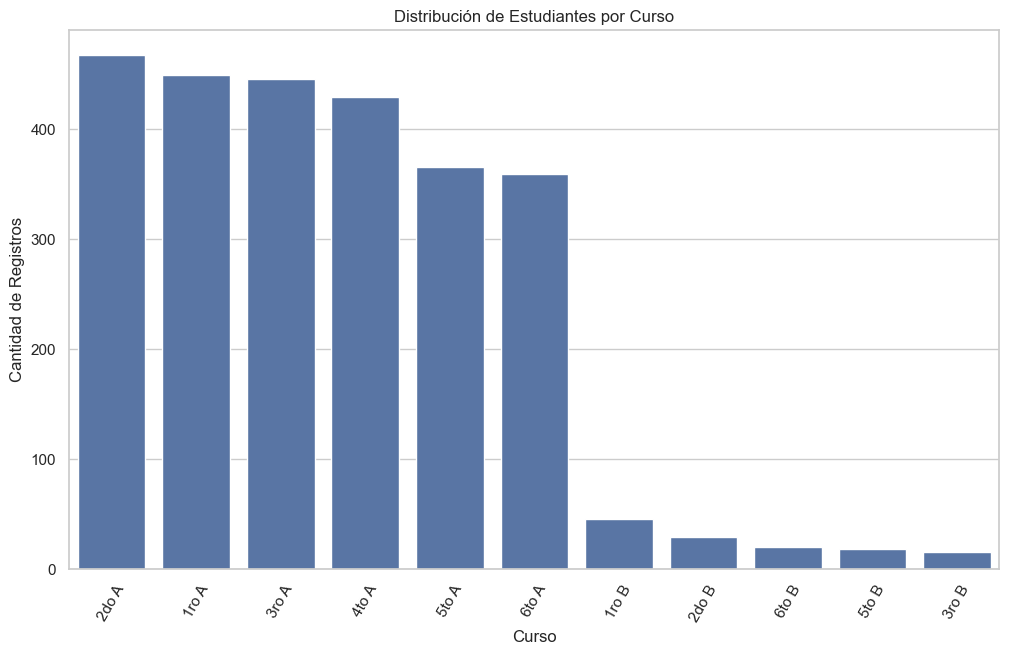


Value Counts de Curso:
Curso
2do A    467
1ro A    449
3ro A    445
4to A    429
5to A    365
6to A    359
1ro B     45
2do B     29
6to B     20
5to B     18
3ro B     15
Name: count, dtype: int64


In [52]:
# Distribución por Curso
if 'Curso' in df.columns:
    plt.figure()
    cursos_ordenados = df['Curso'].value_counts().index
    sns.countplot(data=df, x='Curso', order=cursos_ordenados)
    plt.title('Distribución de Estudiantes por Curso')
    plt.xlabel('Curso')
    plt.ylabel('Cantidad de Registros')
    plt.xticks(rotation=60)
    plt.savefig("../Gráficos/Salida del código/Distribución de estudiantes por curso")
    plt.show()
    print(f"\nValue Counts de Curso:\n{df['Curso'].value_counts()}")


##### Analisis bivariado

###### <b>Grafica: </b> Promedio Vs. Nota de Matematica

--- Relaciones Numérico vs. Numérico ---


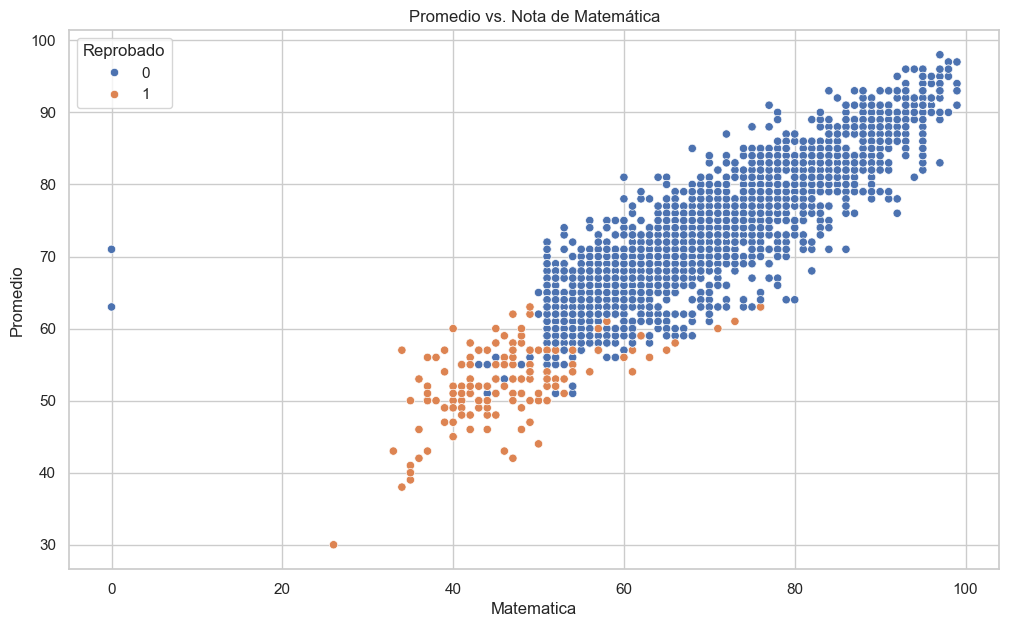

In [53]:
# --- Análisis Bivariado (Relación entre dos variables) ---
print("--- Relaciones Numérico vs. Numérico ---")

# Scatter plot (ejemplo: Promedio vs. alguna materia específica si existe)
if 'Matematica' in df.columns:
    plt.figure()
    sns.scatterplot(data=df, x='Matematica', y='Promedio', hue='Reprobado')
    plt.title('Promedio vs. Nota de Matemática')
    plt.show()

###### <b>Grafica: </b> Distribucion del promedio por estado de reprobacion


--- Relaciones Categórico vs. Numérico ---


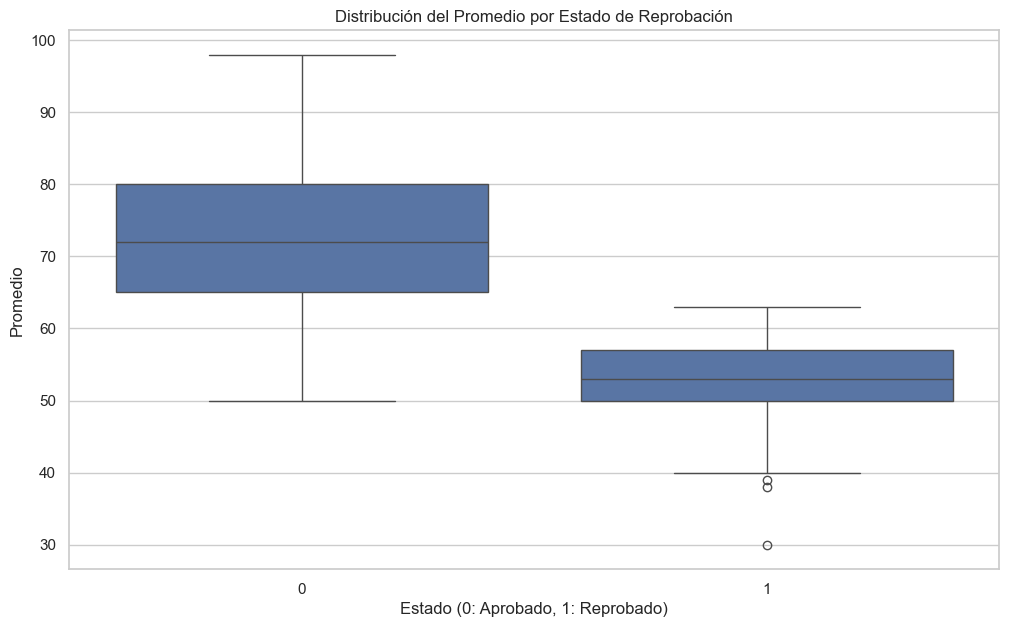

In [54]:
print("\n--- Relaciones Categórico vs. Numérico ---")

# Promedio vs. Reprobado
plt.figure()
sns.boxplot(data=df, x='Reprobado', y='Promedio')
plt.title('Distribución del Promedio por Estado de Reprobación')
plt.xlabel('Estado (0: Aprobado, 1: Reprobado)')
plt.ylabel('Promedio')
plt.show()

###### <b>Grafica: </b> Distribucion del promedio por genero

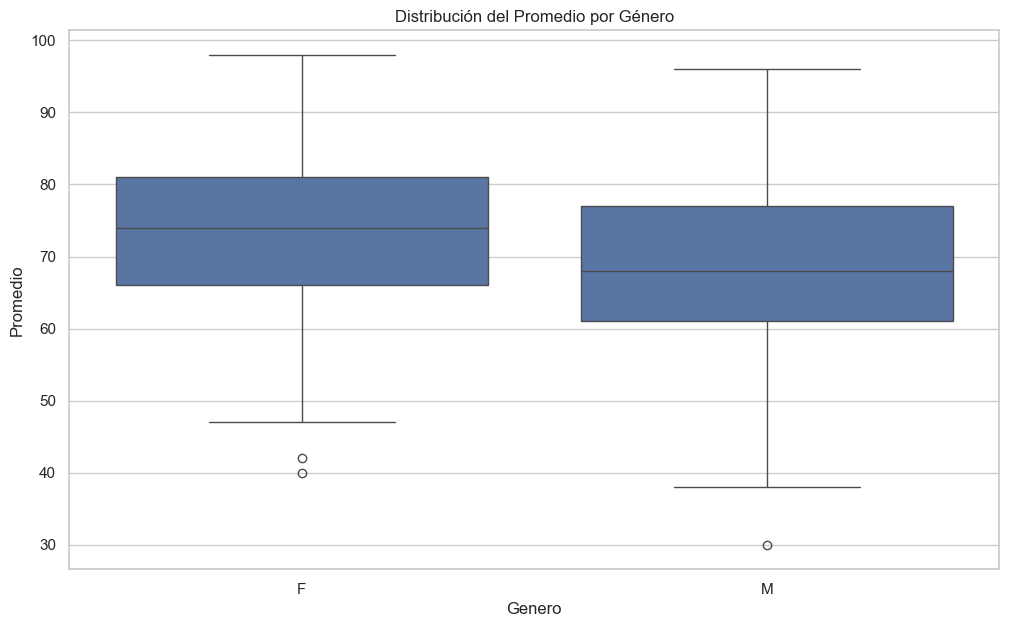

In [55]:
# Promedio vs. Género
if 'Genero' in df.columns:
    plt.figure()
    sns.boxplot(data=df, x='Genero', y='Promedio')
    plt.title('Distribución del Promedio por Género')
    plt.show()

###### <b>Grafica: </b> Distribucion del promedio por nivel educativo

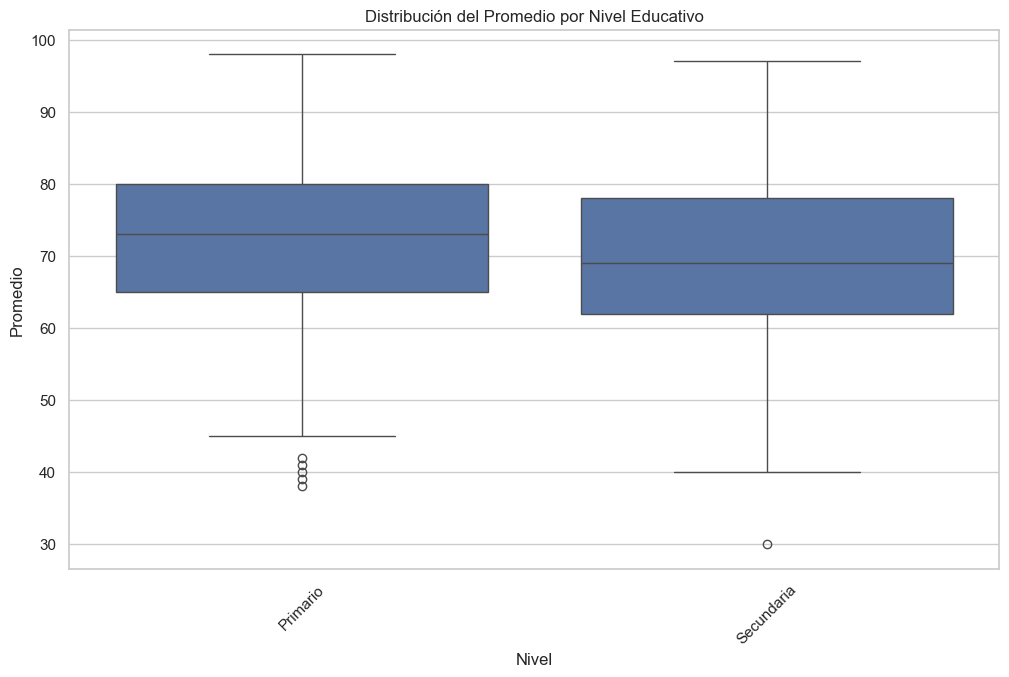

In [56]:
# Promedio vs. Nivel
if 'Nivel' in df.columns:
    plt.figure()
    sns.boxplot(data=df, x='Nivel', y='Promedio')
    plt.title('Distribución del Promedio por Nivel Educativo')
    plt.xticks(rotation=45)
    plt.show()

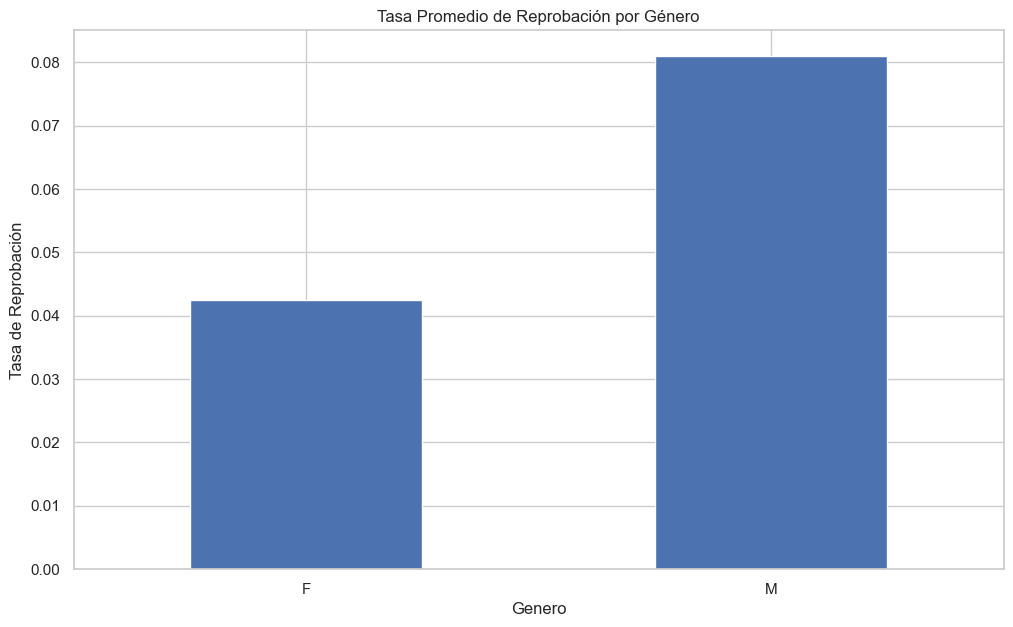

In [57]:
# Tasa de Reprobación vs. Género
if 'Genero' in df.columns:
    plt.figure()
    df.groupby('Genero')['Reprobado'].mean().plot(kind='bar') # mean() en 0/1 da la tasa
    plt.title('Tasa Promedio de Reprobación por Género')
    plt.ylabel('Tasa de Reprobación')
    plt.xticks(rotation=0)
    plt.show()

###### <b>Grafica: </b> Reprobacion poe nivel educativo


--- Relaciones Categórico vs. Categórico ---

Tabla de Contingencia: Nivel vs. Reprobado
Reprobado      0   1
Nivel               
Primario    1401  74
Secundaria  1077  89


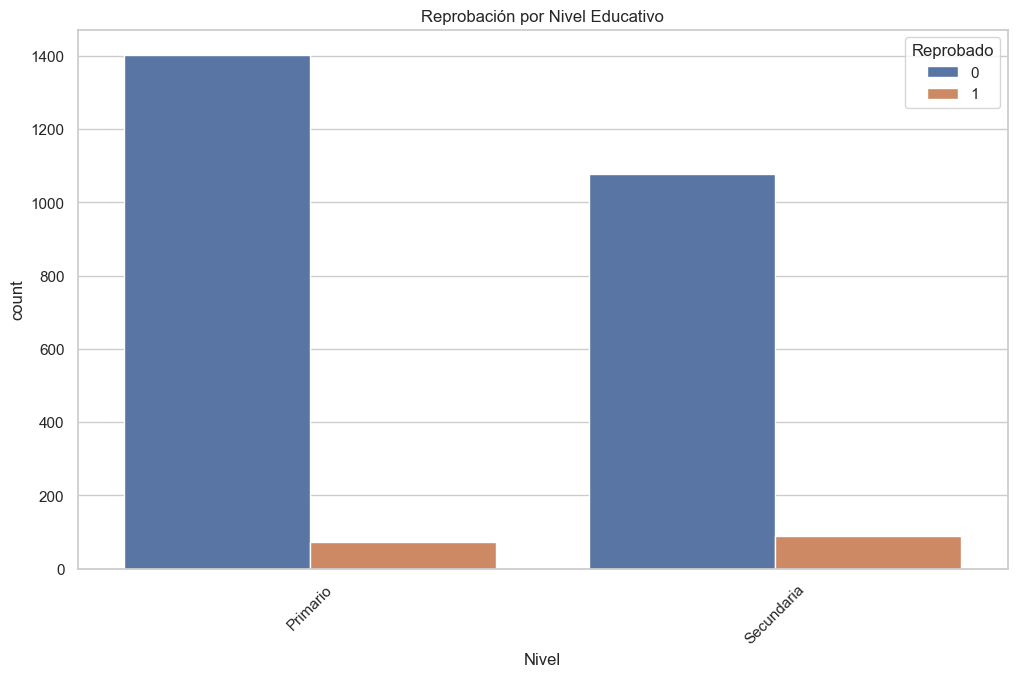

In [58]:
print("\n--- Relaciones Categórico vs. Categórico ---")

# Tabla de contingencia: Nivel vs Reprobado
if 'Nivel' in df.columns:
    print("\nTabla de Contingencia: Nivel vs. Reprobado")
    print(pd.crosstab(df['Nivel'], df['Reprobado']))
    # Visualización
    plt.figure()
    sns.countplot(data=df, x='Nivel', hue='Reprobado', order=df['Nivel'].value_counts().index)
    plt.title('Reprobación por Nivel Educativo')
    plt.xticks(rotation=45)
    plt.show()

###### Otras graficas temporales

--- 6. Análisis Temporal (Evolución por Gestión) ---


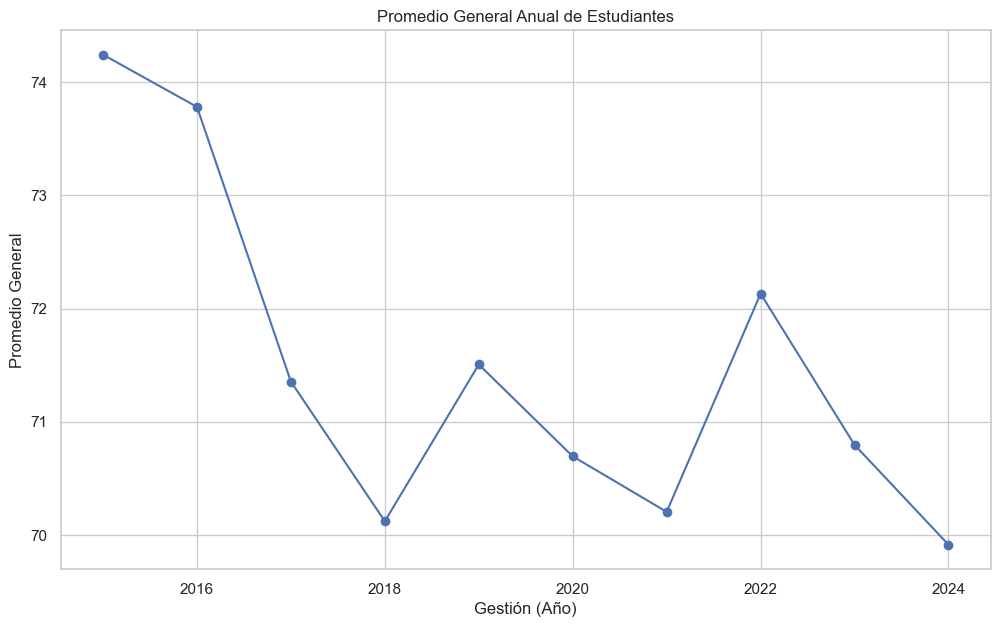

In [59]:
# --- Análisis Temporal ---
print("--- 6. Análisis Temporal (Evolución por Gestión) ---")

# Evolución del Promedio general por año
plt.figure()
df.groupby('Gestion')['Promedio'].mean().plot(marker='o')
plt.title('Promedio General Anual de Estudiantes')
plt.ylabel('Promedio General')
plt.xlabel('Gestión (Año)')
plt.grid(True)
plt.show()

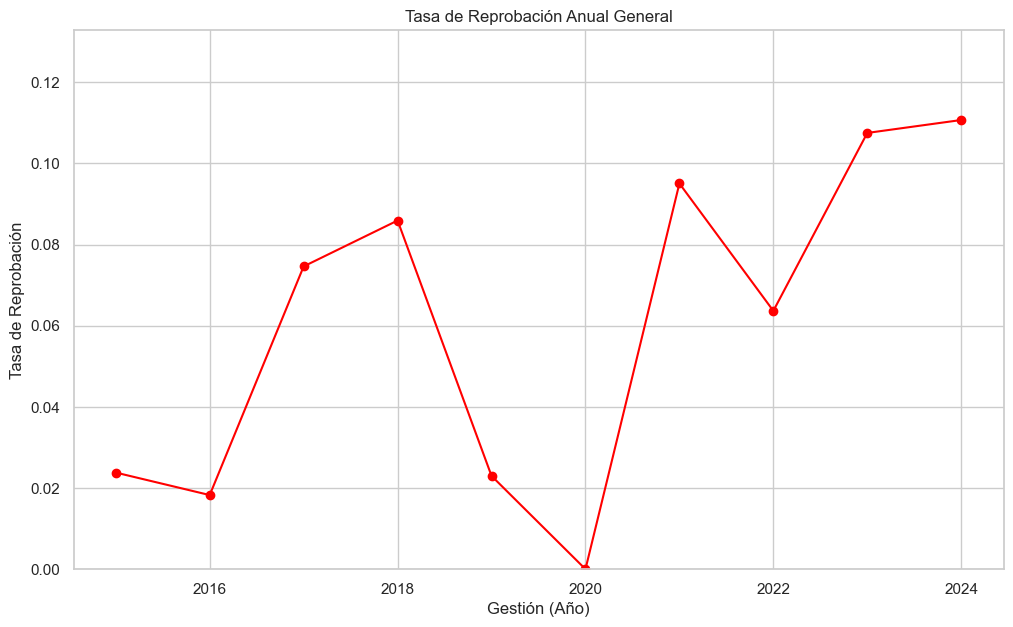

In [60]:
# Evolución de la Tasa de Reprobación por año
plt.figure()
df.groupby('Gestion')['Reprobado'].mean().plot(marker='o', color='red')
plt.title('Tasa de Reprobación Anual General')
plt.ylabel('Tasa de Reprobación')
plt.xlabel('Gestión (Año)')
plt.grid(True)
plt.ylim(0, df.groupby('Gestion')['Reprobado'].mean().max() * 1.2) # Ajustar límite y
plt.show()

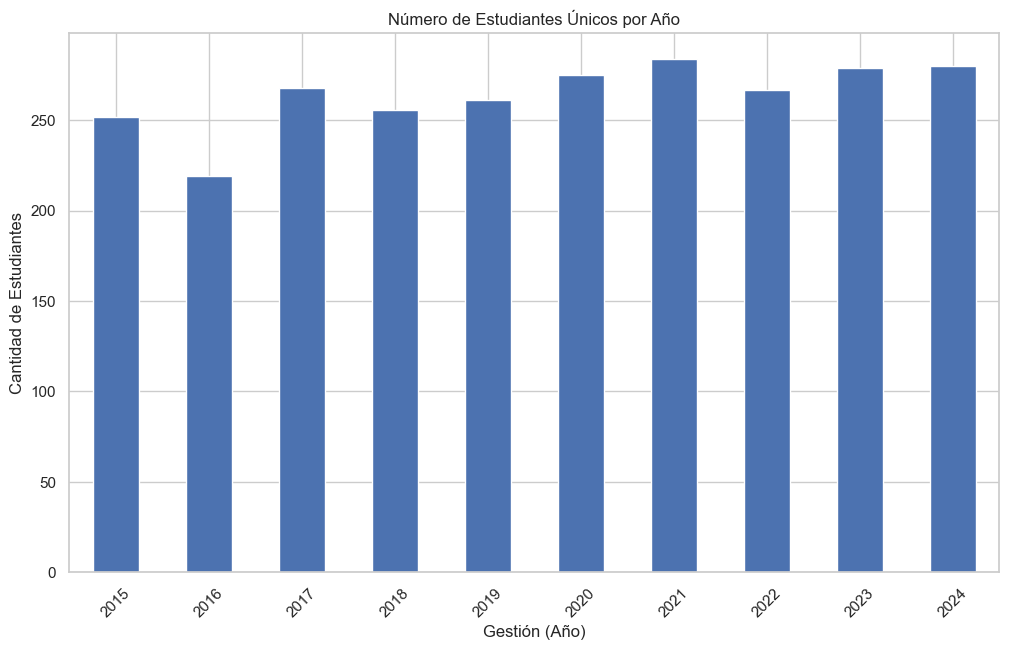

In [61]:
# Número de estudiantes por año (para ver si hay cambios en la población)
plt.figure()
df.groupby('Gestion')['Codigo Rude'].nunique().plot(kind='bar')
plt.title('Número de Estudiantes Únicos por Año')
plt.ylabel('Cantidad de Estudiantes')
plt.xlabel('Gestión (Año)')
plt.xticks(rotation=45)
plt.show()

### Identificación de las materias con mayor índice de reprobación

In [62]:
df.head()

,Gestion,Nivel,Curso,A. Paterno,A. Materno,Nombres,Codigo Rude,Genero,Fecha Nac.,Lug. Nac,...,Matematica,T. General/Esp,Fisica,Quimica,Bio./C.Nat,Cosmov y,Val. Esp. Rel,Psicologia,Promedio,Reprobado
0,2015,Primario,1ro A,AGUILAR,SURUBI,DAYANE PRISCILA,8196001120142086,F,2009-05-12,SC,...,77,71,0,0,75,0,79,0,78,0
1,2015,Primario,1ro A,BANEGAS,BLANCO,JUAN DANIEL,5195000120142681,M,2008-11-24,SC,...,57,58,0,0,57,0,52,0,60,0
2,2015,Primario,1ro A,BARRERO,ROJAS,LUIS DEIVY,5195000120142734,M,2009-03-06,SC,...,71,76,0,0,72,0,65,0,76,0
3,2015,Primario,1ro A,BECKMANN,MAMANI,ANDRES,8098050820131175,M,2008-11-13,CBB,...,85,81,0,0,86,0,89,0,86,0
4,2015,Primario,1ro A,BEJARANO,CONDORI,ADRIANA,719500632014275,F,2008-12-28,SC,...,69,75,0,0,79,0,75,0,77,0


#### Mapa de calor de correlaciones

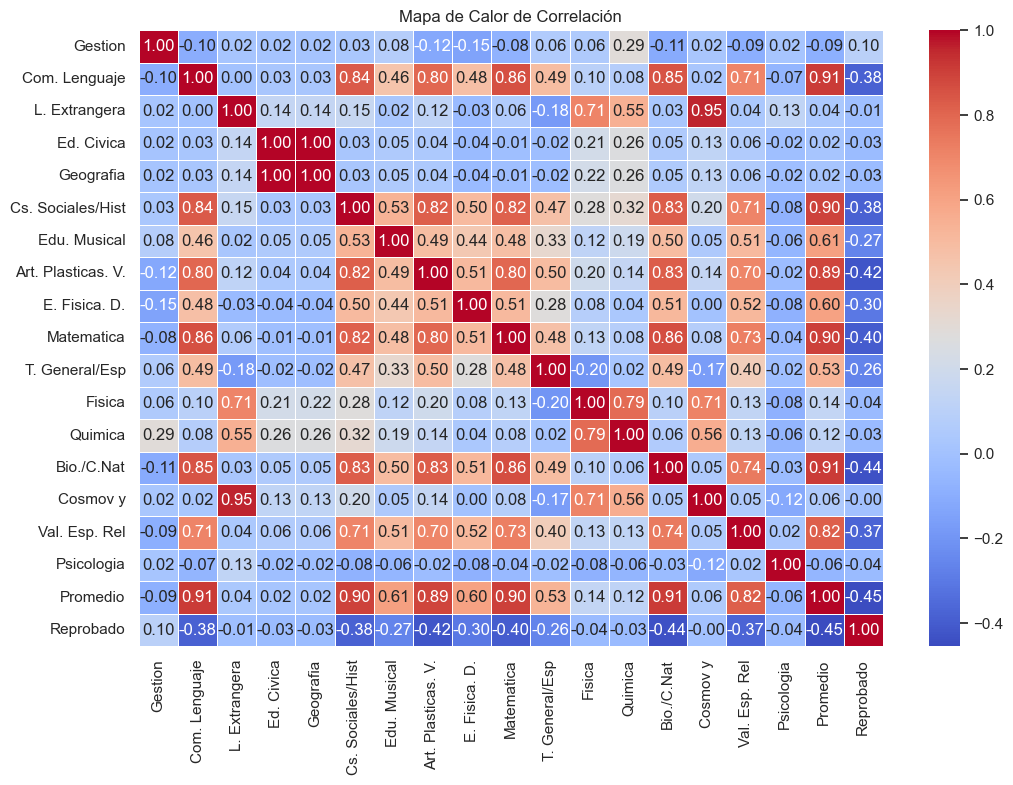

In [63]:
correlacion = df.select_dtypes(include=["number"]).corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor de Correlación")
plt.savefig("../Gráficos/Salida del código/map_correlation.png")
plt.show()

## <b>Fase 4: </b> Modelamiento

### Diseñar y evaluar modelos predictivos

#### Creación de tabla minable

In [64]:
# Crear una copia explícita para evitar el error
tabla_minable = df[["Codigo Rude", "Genero", "Nivel", "Curso", "Gestion", "Promedio", "Reprobado"]].copy()

In [65]:
# Guardar la tabla
tabla_minable.to_csv("./Salidas del programa/tabla_minable.csv", index=False)
print("✅ Tabla minable creada exitosamente.")

✅ Tabla minable creada exitosamente.


In [66]:
tabla_minable.head()

,Codigo Rude,Genero,Nivel,Curso,Gestion,Promedio,Reprobado
0,8196001120142086,F,Primario,1ro A,2015,78,0
1,5195000120142681,M,Primario,1ro A,2015,60,0
2,5195000120142734,M,Primario,1ro A,2015,76,0
3,8098050820131175,M,Primario,1ro A,2015,86,0
4,719500632014275,F,Primario,1ro A,2015,77,0


In [67]:
tabla_minable.groupby("Gestion")["Reprobado"].sum()

Gestion
2015     6
2016     4
2017    20
2018    22
2019     6
2020     0
2021    27
2022    17
2023    30
2024    31
Name: Reprobado, dtype: int32

#### Importación de bibliotecas

In [68]:
!pip install catboost optuna category_encoders imblearn shap xgboost

##### Importando librerias necesarias

In [69]:
# librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix, precision_recall_curve
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import logging

#### Creación de logging

In [70]:
# --- Configuración de Logging ---
# Configura el logger para escribir en un archivo y en la consola
log_file = "student_analysis.log"
logging.basicConfig(
    level=logging.INFO, # Nivel mínimo de mensajes a registrar (DEBUG, INFO, WARNING, ERROR, CRITICAL)
    format='%(asctime)s - %(levelname)s - %(message)s', # Formato de los mensajes
    handlers=[
        logging.FileHandler(log_file), # Escribir logs en un archivo
        logging.StreamHandler() # Mostrar logs en la consola
    ]
)
# Obtener el objeto logger
logger = logging.getLogger(__name__)
# --- Fin Configuración de Logging ---

#### Preprocesamiento de datos

In [71]:
# Preprocesamiento de datos
def preprocess_data(df):
    """Preprocesa el dataframe para análisis y modelado."""
    logger.info("Iniciando preprocesamiento de datos...")
    # Ordenar por Código Rude y Gestión
    df = df.sort_values(by=["Codigo Rude", "Gestion"])

    # Identificar primer año de cada estudiante
    df["Primer_Anio"] = df.groupby("Codigo Rude")["Gestion"].transform("min")

    # Crear la variable objetivo (si el estudiante reprueba el siguiente año)
    df["Reprobado_siguiente"] = df.groupby("Codigo Rude")["Reprobado"].shift(-1)

    # Eliminar la última gestión ya que no podemos saber si reprobaron después
    max_year = df["Gestion"].max()
    logger.info(f"Año máximo en los datos: {max_year}")
    df_model = df[df["Gestion"] < max_year].copy()

    # Guardar los datos del último año para predicciones futuras
    df_future = df[df["Gestion"] == max_year].copy()
    logger.info(f"Datos para modelado: {df_model.shape[0]} filas (hasta {max_year-1})")
    logger.info(f"Datos para predicción futura: {df_future.shape[0]} filas ({max_year})")

    # Eliminar filas con valores nulos en la variable objetivo
    initial_rows = df_model.shape[0]
    df_model = df_model.dropna(subset=["Reprobado_siguiente"])
    dropped_rows = initial_rows - df_model.shape[0]
    if dropped_rows > 0:
        logger.warning(f"Se eliminaron {dropped_rows} filas con 'Reprobado_siguiente' nulo (del último año por estudiante).")
    df_model["Reprobado_siguiente"] = df_model["Reprobado_siguiente"].astype(int)

    logger.info("Preprocesamiento de datos completado.")
    return df_model, df_future, max_year

#### Creacion de caracteristicas avanzadas

In [72]:
# Creación de características avanzadas
def create_features(df):
    """Crea características avanzadas a partir del historial académico."""
    logger.info("Iniciando creación de características...")

    # Agrupar por estudiante
    grouped = df.groupby("Codigo Rude")

    # Características basadas en historial académico
    df["Reprobaciones_acumuladas"] = grouped["Reprobado"].cumsum()
    df["Promedio_ultimos_3"] = grouped["Promedio"].rolling(3, min_periods=1).mean().reset_index(level=0, drop=True)
    df["Tendencia_promedio"] = grouped["Promedio"].diff().fillna(0)
    df["Variabilidad_promedio"] = grouped["Promedio"].rolling(3, min_periods=1).std().fillna(0).reset_index(level=0, drop=True)

    # Características de años en el sistema
    df["Años_en_sistema"] = df.groupby("Codigo Rude").cumcount() + 1

    # Indicador de estudiante nuevo
    if "Primer_Anio" in df.columns:
        current_year = df["Gestion"].max()
        df["Es_Estudiante_Nuevo"] = (df["Primer_Anio"] == current_year).astype(int)
    else:
        df["Es_Estudiante_Nuevo"] = 0

    # Calcular promedio global del estudiante hasta el momento
    df["Promedio_global"] = grouped["Promedio"].transform(lambda x: x.expanding().mean())

    # Calcular si el estudiante está mejorando o empeorando (tendencia)
    df["Mejorando"] = grouped["Promedio"].transform(lambda x: x.rolling(2, min_periods=2).apply(lambda y: 1 if y.iloc[1] > y.iloc[0] else 0)).fillna(0)

    # Características adicionales
    # Diferencia entre promedio actual y promedio global
    df["Delta_promedio"] = df["Promedio"] - df["Promedio_global"]

    # Ratio de reprobaciones por año (evitar división por cero)
    df["Ratio_reprobacion"] = df["Reprobaciones_acumuladas"] / df["Años_en_sistema"]

    # Volatilidad del rendimiento en los últimos años (desviación estándar móvil)
    df["Volatilidad_rendimiento"] = grouped["Promedio"].transform(lambda x: x.rolling(3, min_periods=1).std()).fillna(0)

    # Aceleración del promedio (cambio en la tendencia)
    df["Aceleracion_promedio"] = grouped["Tendencia_promedio"].diff().fillna(0)

    logger.info("Creación de características completada.")
    return df

#### Dividiendo datos por año

In [73]:
# Dividir datos según años
def temporal_split(df, test_year):
    """Divide los datos en entrenamiento y prueba basado en años."""
    logger.info(f"Realizando división temporal: entrenamiento < {test_year}, prueba = {test_year}")
    # Usar años anteriores para entrenamiento
    df_train = df[df["Gestion"] < test_year]
    # Usar el año especificado para prueba
    df_test = df[df["Gestion"] == test_year]

    logger.info(f"Tamaño entrenamiento: {df_train.shape[0]} filas")
    logger.info(f"Tamaño prueba: {df_test.shape[0]} filas")
    return df_train, df_test

#### Preparacion de datos para el modelado

In [74]:
# Preparar datos para modelado
def prepare_model_data(df_train, df_test):
    """Prepara características X e y para entrenar y evaluar modelos."""
    logger.info("Preparando datos para modelado (codificación y escalado)...")
    # Lista de características para eliminar
    drop_cols = ["Reprobado_siguiente", "Gestion", "Codigo Rude"]

    # Codificación One-Hot para variables categóricas
    categorical_cols = ["Genero", "Nivel", "Curso"]
    logger.info(f"Aplicando One-Hot Encoding a: {categorical_cols}")
    df_combined = pd.concat([df_train, df_test])
    # Verificar si las columnas existen antes de codificar
    cols_to_encode = [col for col in categorical_cols if col in df_combined.columns]
    if len(cols_to_encode) < len(categorical_cols):
        missing_cols = set(categorical_cols) - set(cols_to_encode)
        logger.warning(f"Columnas categóricas no encontradas y no se codificarán: {missing_cols}")

    if cols_to_encode:
        df_encoded = pd.get_dummies(df_combined, columns=cols_to_encode, drop_first=True)
    else:
        df_encoded = df_combined # No hacer nada si no hay columnas que codificar

    # Separar de nuevo en train y test después de la codificación
    train_idx = df_encoded.index.isin(df_train.index)
    df_train_encoded = df_encoded[train_idx]
    df_test_encoded = df_encoded[~train_idx]

    # Separar variables predictoras y objetivo
    logger.info(f"Columnas a eliminar antes de escalar: {drop_cols}")
    # Asegurarse de que las columnas a eliminar existen
    existing_drop_cols_train = [col for col in drop_cols if col in df_train_encoded.columns]
    existing_drop_cols_test = [col for col in drop_cols if col in df_test_encoded.columns]

    X_train = df_train_encoded.drop(columns=existing_drop_cols_train)
    y_train = df_train_encoded["Reprobado_siguiente"]
    X_test = df_test_encoded.drop(columns=existing_drop_cols_test)
    y_test = df_test_encoded["Reprobado_siguiente"]

    # Guardar nombres de columnas antes de escalar
    feature_names = X_train.columns
    logger.info(f"Número de características para el modelo: {len(feature_names)}")
    logger.debug(f"Nombres de características: {feature_names.tolist()}") # Log detallado opcional

    # Estandarizar los datos
    logger.info("Aplicando StandardScaler a las características.")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    logger.info("Preparación de datos para modelado completada.")
    return X_train_scaled, y_train, X_test_scaled, y_test, scaler, feature_names

#### Selección de modelos - Entrenar y evaluar múltiples modelos

In [75]:
# Entrenar y evaluar múltiples modelos
def train_evaluate_models(X_train, y_train, X_test, y_test, feature_names):
    """Entrena varios modelos y selecciona el mejor basado en rendimiento."""
    logger.info("Iniciando entrenamiento y evaluación de modelos...")
    # Calcular pesos de clase para manejar desbalanceo
    try:
        class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
        class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}
        logger.info(f"Pesos de clase calculados (balanced): {class_weight_dict}")
        scale_pos_weight_xgb = class_weights[1] / class_weights[0] if len(class_weights) > 1 and class_weights[0] != 0 else 1
        logger.info(f"scale_pos_weight para XGBoost: {scale_pos_weight_xgb:.4f}")
    except Exception as e:
        logger.error(f"Error calculando pesos de clase: {e}. Usando defaults.")
        class_weight_dict = 'balanced'
        scale_pos_weight_xgb = 1

    # Definir modelos con optimización de hiperparámetros
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, class_weight=class_weight_dict, random_state=42),
        "Random Forest": RandomForestClassifier(n_estimators=100, class_weight=class_weight_dict, random_state=42),
        "XGBoost": XGBClassifier(scale_pos_weight=scale_pos_weight_xgb, eval_metric='logloss', use_label_encoder=False, random_state=42), # Añadido use_label_encoder=False
        "Gradient Boosting": GradientBoostingClassifier(random_state=42), # No soporta class_weight directamente, se podría submuestrear o usar pesos en fit
        "SVM": SVC(probability=True, class_weight=class_weight_dict, random_state=42),
        "MLP": MLPClassifier(max_iter=500, random_state=42, early_stopping=True),
        "LightGBM": LGBMClassifier(random_state=42, class_weight=class_weight_dict),
        "CatBoost": CatBoostClassifier(random_state=42, verbose=0, auto_class_weights='Balanced')
    }

    # Parámetros para GridSearch por modelo
    param_grids = {
        "Logistic Regression": {'C': [0.01, 0.1, 1, 10]},
        "Random Forest": {'max_depth': [5, 10, None], 'min_samples_split': [2, 10]},
        "XGBoost": {'max_depth': [3, 5, 7], 'learning_rate': [0.05, 0.1]},
        "Gradient Boosting": {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]},
        "SVM": {'C': [0.1, 1, 10], 'gamma': ['scale', 0.1]},
        "MLP": {'hidden_layer_sizes': [(50,), (100,)], 'alpha': [0.0001, 0.001]},
        "LightGBM": {'num_leaves': [31, 50], 'learning_rate': [0.05, 0.1]},
        "CatBoost": {'depth': [4, 6], 'learning_rate': [0.05, 0.1]}
    }

    # Resultados para cada modelo
    results = {}
    best_models = {}

    print(results)

    # Entrenar y evaluar cada modelo
    for name, model in models.items():
        logger.info(f"--- Optimizando hiperparámetros para {name} ---")
        # Usar TimeSeriesSplit para CV si es apropiado, aunque 5-fold estándar también es común
        # cv_strategy = 5 # CV estándar
        cv_strategy = TimeSeriesSplit(n_splits=5)  # Usar validación cruzada para series temporales
        logger.info(f"Usando TimeSeriesSplit con {cv_strategy.n_splits} divisiones para validación cruzada")
        grid = GridSearchCV(model, param_grids[name], cv=cv_strategy, scoring='f1_weighted', n_jobs=-1) # Usar f1_weighted

        try:
            grid.fit(X_train, y_train)
            best_models[name] = grid.best_estimator_
            logger.info(f"Mejores parámetros para {name}: {grid.best_params_}")

            # Predecir en conjunto de prueba
            y_pred = grid.best_estimator_.predict(X_test)
            y_prob = grid.best_estimator_.predict_proba(X_test)[:, 1]

            # Evaluar y almacenar resultados
            accuracy = accuracy_score(y_test, y_pred)
            # Usar zero_division=0 para evitar warnings si una clase no tiene predicciones
            report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
            report_str = classification_report(y_test, y_pred, zero_division=0) # Para loggear

            results[name] = {
                'model': grid.best_estimator_,
                'params': grid.best_params_,
                'accuracy': accuracy,
                'f1_weighted': report['weighted avg']['f1-score'], # Guardar f1_weighted consistentemente
                'precision_weighted': report['weighted avg']['precision'],
                'recall_weighted': report['weighted avg']['recall'],
                'predictions': y_pred,
                'probabilities': y_prob
            }

            logger.info(f"Resultados de {name} en conjunto de prueba:")
            logger.info(f"  Accuracy: {accuracy:.4f}")
            logger.info(f"  F1 Score (Weighted): {report['weighted avg']['f1-score']:.4f}") # Log f1_weighted
            logger.info(f"  Classification Report:\n{report_str}")

            # Si es un modelo basado en árboles, mostrar importancia de características
            if hasattr(grid.best_estimator_, 'feature_importances_'):
                importances = grid.best_estimator_.feature_importances_

                # Normalizar a escala 0-1 (Método 1: dividir por el máximo)
                max_importance = np.max(importances)
                importances_normalized = importances / max_importance if max_importance > 0 else importances

                indices = np.argsort(importances)[::-1]
                logger.info("  Importancia de características (Top 10, Normalizada 0-1):")
                for i in range(min(10, len(indices))):
                     # Asegurarse que indice[i] está dentro de los límites de feature_names
                     if indices[i] < len(feature_names):
                         logger.info(f"    {feature_names[indices[i]]}: {importances_normalized[indices[i]]:.4f}")
                     else:
                         logger.warning(f"Índice de característica {indices[i]} fuera de los límites ({len(feature_names)}).")

        except Exception as e:
            logger.error(f"Error entrenando o evaluando {name}: {e}")
            results[name] = None # Marcar como fallido

    # Filtrar modelos que fallaron
    successful_results = {k: v for k, v in results.items() if v is not None}
    if not successful_results:
        logger.error("Todos los modelos fallaron al entrenar/evaluar.")
        return None, None, None, None

    # Seleccionar mejor modelo basado en F1-score ponderado
    best_model_name = max(successful_results, key=lambda k: successful_results[k]['f1_weighted'])
    best_model = successful_results[best_model_name]['model']
    logger.info(f"\n--- Mejor modelo seleccionado: {best_model_name} ---")
    logger.info(f"Basado en F1 Score (Weighted): {successful_results[best_model_name]['f1_weighted']:.4f}")

    # Evaluar el mejor modelo seleccionado con validación cruzada para verificar su robustez
    logger.info(f"\nEvaluando robustez de {best_model_name} con validación cruzada...")
    cv_scores = {}
    tscv = TimeSeriesSplit(n_splits=5)  # Validación cruzada de series temporales
    for metric_name, scoring in [('accuracy', 'accuracy'), ('f1', 'f1_weighted'),
                                 ('precision', 'precision_weighted'), ('recall', 'recall_weighted')]:
        try:
            from sklearn.model_selection import cross_val_score
            scores = cross_val_score(best_model, X_train, y_train, cv=tscv, scoring=scoring)
            cv_scores[metric_name] = scores
            logger.info(f"CV {metric_name.capitalize()}: {scores.mean():.4f} (±{scores.std():.4f})")
        except Exception as e:
            logger.error(f"Error en validación cruzada para {metric_name}: {e}")

    # Guardar resultados de CV para el mejor modelo
    results[best_model_name]['cv_scores'] = cv_scores
    # Guardar todas las métricas para análisis comparativo
    all_metrics = pd.DataFrame({
        'Modelo': list(successful_results.keys()),
        'Accuracy': [successful_results[m]['accuracy'] for m in successful_results],
        'F1_Weighted': [successful_results[m]['f1_weighted'] for m in successful_results], # Usar f1_weighted
        'Precision_Weighted': [successful_results[m]['precision_weighted'] for m in successful_results],
        'Recall_Weighted': [successful_results[m]['recall_weighted'] for m in successful_results]
    })
    logger.info(f"\nResumen de métricas de todos los modelos:\n{all_metrics.to_string()}")

    logger.info("Entrenamiento y evaluación de modelos completado.")
    return successful_results, best_model, best_model_name, all_metrics

In [76]:
# Visualizar resultados
def visualize_results(results, y_test, best_model_name, all_metrics):
    """Genera visualizaciones para analizar resultados de modelos."""
    if not results or all_metrics is None or best_model_name not in results:
         logger.warning("No hay resultados válidos para visualizar.")
         return

    logger.info("Generando visualizaciones...")

    # Gráfico comparativo de todos los modelos
    try:
        plt.figure(figsize=(12, 8))
        metric_colors = {'Accuracy': 'blue', 'F1_Weighted': 'green', 'Precision_Weighted': 'orange', 'Recall_Weighted': 'red'}
        metrics_to_plot = [col for col in metric_colors.keys() if col in all_metrics.columns]

        x = np.arange(len(all_metrics))
        width = 0.18 # Ajustar ancho para métricas
        multiplier = 0

        for metric in metrics_to_plot:
            offset = width * multiplier
            plt.bar(x + offset, all_metrics[metric], width, label=metric, color=metric_colors[metric])
            multiplier += 1

        plt.xlabel('Modelo')
        plt.ylabel('Puntuación')
        plt.title('Comparación de Modelos por Métricas Ponderadas')
        plt.xticks(x + width * (len(metrics_to_plot) - 1) / 2, all_metrics['Modelo'], rotation=45, ha='right')
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
        plt.tight_layout()
        plt.grid(True, axis='y', linestyle='--', alpha=0.7)
        plt.savefig("../Gráficos/Salida del código/model_comparison.png") # Guardar gráfico
        logger.info("Gráfico de comparación de modelos guardado como model_comparison.png")
        plt.show()
    except Exception as e:
        logger.error(f"Error generando gráfico de comparación de modelos: {e}")

    # Curva ROC para el mejor modelo
    try:
        best_probs = results[best_model_name]['probabilities']
        fpr, tpr, _ = roc_curve(y_test, best_probs)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('Tasa de Falsos Positivos')
        plt.ylabel('Tasa de Verdaderos Positivos')
        plt.title(f'Curva ROC - {best_model_name}')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.savefig(""f"../Gráficos/Salida del código/roc_curve_{best_model_name}.png")
        logger.info(f"Curva ROC guardada como roc_curve_{best_model_name}.png")
        plt.show()
    except Exception as e:
        logger.error(f"Error generando curva ROC para {best_model_name}: {e}")

    # Curva Precision-Recall
    try:
        precision, recall, _ = precision_recall_curve(y_test, best_probs)
        plt.figure(figsize=(8, 6))
        plt.plot(recall, precision, color='green')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Curva Precision-Recall - {best_model_name}')
        plt.grid(True)
        plt.savefig(f"../Gráficos/Salida del código/precision_recall_curve_{best_model_name}.png")
        logger.info(f"Curva Precision-Recall guardada como precision_recall_curve_{best_model_name}.png")
        plt.show()
    except Exception as e:
        logger.error(f"Error generando curva Precision-Recall para {best_model_name}: {e}")

    # Matriz de confusión
    try:
        cm = confusion_matrix(y_test, results[best_model_name]['predictions'])
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['No Reprobado', 'Reprobado'],
                    yticklabels=['No Reprobado', 'Reprobado'])
        plt.xlabel('Predicción')
        plt.ylabel('Real')
        plt.title(f'Matriz de Confusión - {best_model_name}')
        plt.savefig(f"../Gráficos/Salida del código/confusion_matrix_{best_model_name}.png")
        logger.info(f"Matriz de confusión guardada como confusion_matrix_{best_model_name}.png")
        plt.show()
    except Exception as e:
        logger.error(f"Error generando matriz de confusión para {best_model_name}: {e}")

    # Comparación de curvas ROC para todos los modelos
    try:
        plt.figure(figsize=(10, 8))
        for name, result in results.items():
            if result is not None and 'probabilities' in result:
                fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
                model_auc = auc(fpr, tpr)
                plt.plot(fpr, tpr, label=f'{name} (AUC = {model_auc:.2f})')

        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('Tasa de Falsos Positivos')
        plt.ylabel('Tasa de Verdaderos Positivos')
        plt.title('Comparación de Curvas ROC')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.savefig("../Gráficos/Salida del código/roc_curves_comparison.png")
        logger.info("Comparación de curvas ROC guardada como roc_curves_comparison.png")
        plt.show()
    except Exception as e:
        logger.error(f"Error generando comparación de curvas ROC: {e}")

    logger.info("Visualizaciones generadas.")
    # Visualizar resultados de validación cruzada para el mejor modelo
    try:
        if best_model_name in results and 'cv_scores' in results[best_model_name]:
            cv_scores = results[best_model_name]['cv_scores']
            plt.figure(figsize=(10, 6))

            metrics = list(cv_scores.keys())
            positions = np.arange(len(metrics))

            # Configurar colores por métrica
            colors = {'accuracy': 'blue', 'f1': 'green', 'precision': 'orange', 'recall': 'red'}

            for i, metric in enumerate(metrics):
                scores = cv_scores[metric]
                plt.boxplot(scores, positions=[positions[i]], patch_artist=True,
                            boxprops=dict(facecolor=colors.get(metric, 'blue')))
                # Añadir puntos individuales
                plt.scatter([positions[i]]*len(scores), scores, alpha=0.6,
                            color=colors.get(metric, 'blue'), s=30)

            plt.title(f'Resultados de Validación Cruzada - {best_model_name}')
            plt.xticks(positions, [m.capitalize() for m in metrics])
            plt.ylabel('Puntuación')
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.savefig("../Gráficos/Salida del código/cross_validation_results.png")
            logger.info("Gráfico de resultados de validación cruzada guardado como cross_validation_results.png")
            plt.show()
    except Exception as e:
        logger.error(f"Error generando visualización de resultados de validación cruzada: {e}")

#### Proyectar tendencias futuras

In [77]:
# Proyectar tendencias futuras
def project_future_trends(best_model, scaler, df_future, feature_names, years_to_project=5):
    """Proyecta tendencias de reprobación para años futuros."""

    logger.info(f"Iniciando proyección de tendencias para {years_to_project} años...")
    if df_future.empty:
        logger.warning("DataFrame df_future está vacío. No se puede realizar la proyección.")
        return None, None

    last_year = df_future["Gestion"].max()
    projection_years = range(last_year + 1, last_year + years_to_project + 4)
    logger.info(f"Proyectando desde {last_year + 1} hasta {last_year + years_to_project + 4}")

    # Preparar datos iniciales para proyección
    df_projection = df_future.copy()

    # Inicializar lista para almacenar DataFrames de cada año
    all_predictions_df = []

    # Crear variables para almacenar resultados
    projection_results = {
        'años': [last_year],
        'reprobados_total': [df_future['Reprobado'].sum() if 'Reprobado' in df_future.columns else 0],
        'reprobados_por_año': []
    }
    logger.info(f"Año base ({last_year}): {projection_results['reprobados_total'][0]} reprobados (reales)")

    # Iterar para cada año futuro
    current_df = df_projection.copy()

    for year in projection_years:
        try:
            logger.info(f"Proyectando para el año: {year}")
            # Actualizar año de gestión
            current_df['Gestion'] = year

            # Recalcular características
            logger.debug(f"Recalculando características para {year}...")
            current_df = create_features(current_df)
            logger.debug(f"Columnas después de create_features: {current_df.columns}")
            logger.debug(f"Primeras filas de current_df después de create_features:\n{current_df.head().to_string()}")

            # Codificar variables categóricas
            logger.debug(f"Codificando variables categóricas para {year}...")
            categorical_cols = ["Genero", "Nivel", "Curso"]
            cols_to_encode = [col for col in categorical_cols if col in current_df.columns]
            current_encoded = pd.get_dummies(current_df, columns=cols_to_encode, drop_first=True)
            logger.debug(f"Columnas después de codificar: {current_encoded.columns}")

            # Asegurar columnas correctas
            logger.debug(f"Alineando columnas con las de entrenamiento para {year}...")
            missing_cols = set(feature_names) - set(current_encoded.columns)
            for col in missing_cols:
                current_encoded[col] = 0

            extra_cols = set(current_encoded.columns) - set(feature_names) - set(['Codigo Rude', 'Gestion', 'Reprobado'])
            current_encoded = current_encoded.drop(columns=list(extra_cols))

            X_future = current_encoded[feature_names]

            # Escalar datos
            logger.debug(f"Escalando datos para {year}...")
            logger.debug(f"X_future antes de escalar:\n{X_future.head().to_string()}")
            X_future_scaled = scaler.transform(X_future)
            logger.debug(f"X_future después de escalar:\n{X_future_scaled[:5]}")

            # Predecir reprobaciones - Evitar usar cualquier variable no definida
            logger.debug(f"Prediciendo reprobaciones para {year}...")
            y_pred_future = best_model.predict(X_future_scaled)
            logger.debug(f"Predicciones para {year}:\n{y_pred_future}")

            # Crear DataFrame para las predicciones del año actual
            year_predictions_df = current_df[['Codigo Rude', 'Gestion']].copy()  # Asegurar copiar, no referenciar
            year_predictions_df['Reprobado_Prediccion'] = y_pred_future
            all_predictions_df.append(year_predictions_df)

            reprobados_count = sum(y_pred_future)
            logger.info(f"Año {year}: {reprobados_count} reprobados (predicción)")

            projection_results['años'].append(year)
            projection_results['reprobados_total'].append(reprobados_count)
            projection_results['reprobados_por_año'].append((year, y_pred_future))

            # Actualizar datos para siguiente iteración
            current_df['Reprobado'] = y_pred_future

            # Actualizar promedio
            current_df['Promedio'] = current_df.apply(
                lambda row: row['Promedio'] * 0.9 if row['Reprobado'] == 1
                else min(100, row['Promedio'] * 1.05),
                axis=1
            )
            logger.debug(f"Primeras filas de current_df después de actualizar Promedio:\n{current_df.head().to_string()}")

        except Exception as e:
            logger.error(f"Error prediciendo para el año {year}: {e}")
            logger.error(f"Variables disponibles: {locals().keys()}")
            break

    # Concatenar todas las predicciones en un solo DataFrame
    if all_predictions_df:
        all_predictions_df = pd.concat(all_predictions_df, ignore_index=True)
    else:
        logger.warning("No se generaron predicciones.")
        return None, None

    # Visualizar proyección
    if len(projection_results['años']) > 1:
        try:
            logger.info("Generando gráfico de proyección de reprobaciones...")
            plt.figure(figsize=(10, 6))
            sns.lineplot(x=projection_results['años'], y=projection_results['reprobados_total'],
                        marker='o', color='red', linewidth=2)
            plt.xlabel('Año')
            plt.ylabel('Número de Reprobados (Predicción)')
            plt.title('Proyección de Reprobaciones Futuras')
            plt.xticks(projection_results['años'])
            plt.grid(True)
            plt.savefig("../Gráficos/Salida del código/future_projection.png")
            logger.info("Gráfico de proyección guardado como future_projection.png")
            plt.show()
        except Exception as e:
            logger.error(f"Error generando gráfico de proyección: {e}")

    # Devolver tanto el DataFrame completo como los resultados resumidos
    return all_predictions_df, projection_results

#### Identificando estudiantes en riesgo

In [78]:
# Identificar estudiantes en riesgo
def identify_at_risk_students(best_model, scaler, df_future, feature_names):
    """Identifica estudiantes con alto riesgo de reprobación para el próximo año."""
    logger.info("Identificando estudiantes en riesgo para el próximo año...")
    if df_future.empty:
        logger.warning("DataFrame df_future está vacío. No se puede identificar estudiantes en riesgo.")
        return pd.DataFrame(), pd.DataFrame() # Devolver dataframes vacíos

    # Preprocesar datos del último año real
    df_risk = df_future.copy()
    try:
        logger.debug("Calculando características para identificación de riesgo...")
        df_risk = create_features(df_risk)
    except Exception as e:
        logger.error(f"Error calculando características para identificación de riesgo: {e}")
        return pd.DataFrame(), pd.DataFrame()

    # Codificar variables categóricas
    logger.debug("Codificando variables categóricas para identificación de riesgo...")
    try:
        categorical_cols = ["Genero", "Nivel", "Curso"]
        cols_to_encode = [col for col in categorical_cols if col in df_risk.columns]
        df_risk_encoded = pd.get_dummies(df_risk, columns=cols_to_encode, drop_first=True)
    except Exception as e:
        logger.error(f"Error codificando variables para identificación de riesgo: {e}")
        return pd.DataFrame(), pd.DataFrame()

    # Asegurar que tenemos las mismas columnas que en el entrenamiento
    logger.debug("Alineando columnas con las de entrenamiento para identificación de riesgo...")
    missing_cols = set(feature_names) - set(df_risk_encoded.columns)
    for col in missing_cols:
        df_risk_encoded[col] = 0
    extra_cols = set(df_risk_encoded.columns) - set(feature_names) - set(['Codigo Rude', 'Gestion', 'Reprobado'])
    df_risk_encoded = df_risk_encoded.drop(columns=list(extra_cols))
    try:
        X_risk = df_risk_encoded[feature_names]
    except KeyError as e:
        logger.error(f"Error al seleccionar columnas para predicción de riesgo. Columna faltante: {e}")
        return pd.DataFrame(), pd.DataFrame()

    # Escalar datos
    logger.debug("Escalando datos para identificación de riesgo...")
    try:
        X_risk_scaled = scaler.transform(X_risk)
    except Exception as e:
        logger.error(f"Error escalando datos para identificación de riesgo: {e}")
        return pd.DataFrame(), pd.DataFrame()

    # Predecir probabilidades de reprobación
    logger.debug("Prediciendo probabilidades de reprobación...")
    try:
        risk_probs = best_model.predict_proba(X_risk_scaled)[:, 1]

        # Ajustar el nivel de confianza para estudiantes nuevos
        if 'Es_Estudiante_Nuevo' in df_risk.columns:
            nuevos_indices = df_risk['Es_Estudiante_Nuevo'] == 1
            logger.info(f"Ajustando predicciones para {nuevos_indices.sum()} estudiantes nuevos")

            # Aplicar un enfoque más conservador para estudiantes nuevos
            # Usar el promedio de probabilidad como base para estudiantes nuevos
            if nuevos_indices.any():
                promedio_prob = risk_probs[~nuevos_indices].mean() if (~nuevos_indices).any() else 0.5
                # Ajustar hacia el valor medio para reflejar mayor incertidumbre
                risk_probs[nuevos_indices] = (risk_probs[nuevos_indices] + promedio_prob) / 2
    except Exception as e:
        logger.error(f"Error prediciendo probabilidades para identificación de riesgo: {e}")
        return pd.DataFrame(), pd.DataFrame()

    # Crear dataframe de riesgo con columnas seleccionadas
    logger.debug("Creando DataFrame de riesgo...")
    try:
        risk_data = {
            'Codigo Rude': df_risk['Codigo Rude'],
            'Probabilidad_Reprobacion': risk_probs
        }
        # Añadir otras columnas si existen en df_risk
        optional_cols = ['Genero', 'Nivel', 'Curso', 'Promedio', 'Reprobaciones_acumuladas',
                         'Años_en_sistema', 'Volatilidad_rendimiento']
        for col in optional_cols:
            if col in df_risk.columns:
                 # Renombrar 'Promedio' a 'Promedio_Actual'
                 col_name_in_df = 'Promedio_Actual' if col == 'Promedio' else col
                 risk_data[col_name_in_df] = df_risk[col]
            else:
                 logger.warning(f"Columna opcional '{col}' no encontrada en df_risk para el dataframe de riesgo.")

        risk_df = pd.DataFrame(risk_data)

        # Clasificar nivel de riesgo
        risk_bins = [0, 0.25, 0.5, 0.75, 1.0]
        risk_labels = ['Bajo', 'Medio', 'Alto', 'Muy Alto']
        risk_df['Nivel_Riesgo'] = pd.cut(
            risk_df['Probabilidad_Reprobacion'],
            bins=risk_bins,
            labels=risk_labels,
            right=True # Incluir el límite derecho (ej. 1.0 en 'Muy Alto')
        )
        logger.info(f"Distribución de niveles de riesgo:\n{risk_df['Nivel_Riesgo'].value_counts().to_string()}")

        # Crear dataframe completo con todas las predicciones y features originales + calculadas
        logger.debug("Creando DataFrame completo de predicciones...")
        # Empezar con el df original del último año
        full_predictions_df = df_future.copy()
        # Añadir las features calculadas en df_risk
        features_in_risk = [col for col in df_risk.columns if col not in df_future.columns and col != 'Gestion']
        full_predictions_df = pd.merge(full_predictions_df, df_risk[['Codigo Rude', 'Gestion'] + features_in_risk], on=['Codigo Rude', 'Gestion'], how='left')
        # Añadir probabilidad y nivel de riesgo
        full_predictions_df = pd.merge(full_predictions_df, risk_df[['Codigo Rude', 'Probabilidad_Reprobacion', 'Nivel_Riesgo']], on='Codigo Rude', how='left')

        # Ordenar por probabilidad de reprobación
        risk_df = risk_df.sort_values('Probabilidad_Reprobacion', ascending=False)

    except Exception as e:
        logger.error(f"Error creando DataFrames de riesgo: {e}")
        return pd.DataFrame(), pd.DataFrame()


    # Visualizar distribución de riesgo
    logger.info("Generando visualizaciones de distribución de riesgo...")
    try:
        plt.figure(figsize=(10, 6))
        sns.countplot(x='Nivel_Riesgo', data=risk_df, palette='RdYlGn_r', order=risk_labels)
        plt.xlabel('Nivel de Riesgo')
        plt.ylabel('Número de Estudiantes')
        plt.title('Distribución de Estudiantes por Nivel de Riesgo')
        plt.savefig("../Gráficos/Salida del código/risk_distribution.png")
        logger.info("Gráfico de distribución de riesgo guardado como risk_distribution.png")
        plt.show()
    except Exception as e:
        logger.error(f"Error generando gráfico de distribución de riesgo: {e}")

    # Visualizar distribución de riesgo por género (si existe la columna)
    if 'Genero' in risk_df.columns:
        try:
            plt.figure(figsize=(12, 6))
            sns.countplot(x='Nivel_Riesgo', hue='Genero', data=risk_df, palette='Set2', order=risk_labels)
            plt.xlabel('Nivel de Riesgo')
            plt.ylabel('Número de Estudiantes')
            plt.title('Distribución de Riesgo por Género')
            plt.legend(title='Género')
            plt.savefig("../Gráficos/Salida del código/risk_distribution_gender.png")
            logger.info("Gráfico de distribución de riesgo por género guardado como risk_distribution_gender.png")
            plt.show()
        except Exception as e:
            logger.error(f"Error generando gráfico de distribución de riesgo por género: {e}")

    # Visualizar distribución de riesgo por nivel educativo (si existe la columna)
    if 'Nivel' in risk_df.columns:
        try:
            plt.figure(figsize=(14, 6))
            # Ordenar niveles si es posible (ej. Primaria, Secundaria) - Asumir orden alfabético si no
            level_order = sorted(risk_df['Nivel'].unique())
            sns.countplot(x='Nivel', hue='Nivel_Riesgo', data=risk_df, palette='RdYlGn_r', order=level_order, hue_order=risk_labels)
            plt.xlabel('Nivel Educativo')
            plt.ylabel('Número de Estudiantes')
            plt.title('Distribución de Riesgo por Nivel Educativo')
            plt.legend(title='Nivel de Riesgo')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.savefig("../Gráficos/Salida del código/risk_distribution_level.png")
            logger.info("Gráfico de distribución de riesgo por nivel guardado como risk_distribution_level.png")
            plt.show()
        except Exception as e:
            logger.error(f"Error generando gráfico de distribución de riesgo por nivel: {e}")

    logger.info("Identificación de estudiantes en riesgo completada.")
    return risk_df, full_predictions_df

#### Perfiles de intervencion

In [79]:
# Preparar perfiles de estudiantes para intervención
def prepare_intervention_profiles(risk_df, df_future, top_n=50):
    """Prepara perfiles detallados de estudiantes en riesgo para intervención."""
    logger.info(f"Preparando perfiles de intervención para los {top_n} estudiantes de mayor riesgo...")
    if risk_df.empty or df_future.empty:
        logger.warning("DataFrames de riesgo o futuro vacíos. No se pueden generar perfiles.")
        return pd.DataFrame()

    # Seleccionar estudiantes con mayor riesgo (Alto o Muy Alto)
    high_risk_students = risk_df[risk_df['Nivel_Riesgo'].isin(['Alto', 'Muy Alto'])].head(top_n)
    logger.info(f"Seleccionados {high_risk_students.shape[0]} estudiantes con riesgo Alto o Muy Alto (máximo {top_n}).")

    # Fusionar con datos adicionales del último año si es necesario
    # Asegurarse que las columnas existen en df_future
    cols_to_merge = ['Codigo Rude', 'Gestion']
    if 'Promedio' in df_future.columns:
        cols_to_merge.append('Promedio')
    if 'Reprobado' in df_future.columns: # Reprobado real del último año
        cols_to_merge.append('Reprobado')

    try:
        student_profiles = high_risk_students.merge(
            df_future[cols_to_merge],
            on='Codigo Rude', # Asume que Codigo Rude es único en df_future
            how='left',
            suffixes=('', '_ActualYear') # Sufijo si hay columnas con mismo nombre
        )
        # Renombrar 'Promedio' si se añadió sufijo o si viene de risk_df como 'Promedio_Actual'
        if 'Promedio_ActualYear' in student_profiles.columns:
             student_profiles.rename(columns={'Promedio_ActualYear': 'Promedio_Ultimo_Año'}, inplace=True)
        elif 'Promedio_Actual' in student_profiles.columns:
             student_profiles.rename(columns={'Promedio_Actual': 'Promedio_Ultimo_Año'}, inplace=True)

        # Calcular métricas adicionales para el perfil (si es posible)
        if 'Nivel' in student_profiles.columns and 'Curso' in student_profiles.columns and 'Promedio_Ultimo_Año' in student_profiles.columns:
            try:
                student_profiles['Promedio_Curso_General'] = student_profiles.groupby(['Nivel', 'Curso'])['Promedio_Ultimo_Año'].transform('mean')
                student_profiles['Diferencia_vs_Promedio_Curso'] = student_profiles['Promedio_Ultimo_Año'] - student_profiles['Promedio_Curso_General']
            except Exception as e:
                 logger.warning(f"No se pudo calcular la diferencia vs promedio del curso: {e}")
                 student_profiles['Diferencia_vs_Promedio_Curso'] = np.nan
        else:
            logger.warning("Columnas 'Nivel', 'Curso' o 'Promedio_Ultimo_Año' no disponibles para calcular diferencia vs promedio.")
            student_profiles['Diferencia_vs_Promedio_Curso'] = np.nan

        # Categorizar razones de riesgo (usando función auxiliar)
        logger.debug("Identificando factores de riesgo...")
        student_profiles['Razones_Riesgo'] = student_profiles.apply(
            lambda row: _identify_risk_factors(row), axis=1
        )

        # Recomendar intervenciones (usando función auxiliar)
        logger.debug("Recomendando intervenciones...")
        student_profiles['Intervenciones_Recomendadas'] = student_profiles.apply(
            lambda row: _recommend_interventions(row), axis=1
        )

    except Exception as e:
        logger.error(f"Error creando perfiles de intervención: {e}")
        return pd.DataFrame()


    logger.info("Perfiles de intervención preparados.")
    return student_profiles

#### Identificar factores de riesgo

In [80]:
# Función para identificar factores de riesgo
def _identify_risk_factors(student_row):
    """Identifica los factores que contribuyen al riesgo del estudiante (heurístico)."""
    risk_factors = []

    # Considerar si es estudiante nuevo
    if student_row.get('Es_Estudiante_Nuevo', 0) == 1:
        risk_factors.append("Estudiante nuevo (sin historial académico previo)")

    # Usar .get(key, default) para evitar KeyError si la columna no existe
    if student_row.get('Reprobaciones_Acumuladas', 0) > 0:
        risk_factors.append("Historial de reprobaciones")

    # Usar el promedio del último año si existe, si no, no usar esta regla
    promedio_check = student_row.get('Promedio_Ultimo_Año', 100) # Default alto para no activar si no existe
    if promedio_check < 70: # Umbral hardcodeado
        risk_factors.append("Promedio bajo (<70)")

    # Usar Volatilidad si existe
    volatilidad_check = student_row.get('Volatilidad_Rendimiento', 0) # Default bajo si no existe
    if volatilidad_check > 10: # Umbral hardcodeado
        risk_factors.append("Rendimiento inestable (>10 std dev)")

    # Usar diferencia vs curso si existe y es válida
    diff_check = student_row.get('Diferencia_vs_Promedio_Curso', 0) # Default 0 si no existe o es NaN
    if pd.notna(diff_check) and diff_check < -5: # Umbral hardcodeado
        risk_factors.append("Rendimiento bajo vs curso (<-5 pts)")

    # Si no hay factores identificados, agregar uno genérico
    if not risk_factors:
        risk_factors.append("Riesgo multifactorial (probabilidad alta sin factor dominante claro)")

    return ", ".join(risk_factors)

In [81]:
# Función para recomendar intervenciones
def _recommend_interventions(student_row):
    """Recomienda intervenciones basadas en el perfil de riesgo del estudiante (heurístico)."""
    interventions = []
    razones = student_row.get('Razones_Riesgo', "")

    if "Historial de reprobaciones" in razones:
        interventions.append("Tutoría académica personalizada")

    if "Promedio bajo" in razones:
        interventions.append("Refuerzo académico específico")

    if "Rendimiento inestable" in razones:
        interventions.append("Seguimiento psicopedagógico/orientación")

    if "Rendimiento bajo vs curso" in razones:
        interventions.append("Integración a grupos de estudio")

    if "Riesgo multifactorial" in razones:
         interventions.append("Evaluación diagnóstica integral")

    # Siempre incluir seguimiento si el riesgo es Alto o Muy Alto
    if student_row.get('Nivel_Riesgo') in ['Alto', 'Muy Alto']:
        interventions.append("Monitoreo continuo del progreso")

    # Si no hay intervenciones específicas pero el riesgo es alto, añadir una genérica
    if not interventions and student_row.get('Nivel_Riesgo') in ['Alto', 'Muy Alto']:
         interventions.append("Revisión detallada del caso")

    return ", ".join(interventions)

## <b>Fase 5: </b> Evaluacion

### Diseñar y evaluar modelos predictivos

#### Funcion main

In [92]:
# Función main con logging y manejo de errores
def main(file_path="./Salidas del programa/tabla_minable.csv"):
    logger.info("--- INICIO DEL PROCESO DE ANÁLISIS DE RIESGO ESTUDIANTIL ---")
    logger.info(f"Usando archivo de datos: {file_path}")

    # --- Carga de datos ---
    try:
        df = pd.read_csv(file_path)
        logger.info(f"Datos cargados exitosamente: {df.shape[0]} filas, {df.shape[1]} columnas")
    except FileNotFoundError:
        logger.error(f"Error: El archivo '{file_path}' no fue encontrado.")
        return # Salir si no se puede cargar el archivo
    except Exception as e:
        logger.error(f"Error al cargar el archivo CSV '{file_path}': {e}")
        return

    # --- Preprocesamiento y Feature Engineering ---
    try:
        df_model, df_future, max_year = preprocess_data(df)
        df_model = create_features(df_model) # Crear features solo para datos de modelo
    except Exception as e:
        logger.error(f"Error durante el preprocesamiento o la creación de características: {e}")
        return

    # --- Validación Temporal y Preparación ---
    try:
        test_year = max_year - 1
        logger.info(f"Año de validación (prueba): {test_year}")
        df_train, df_test = temporal_split(df_model, test_year)

        if df_train.empty or df_test.empty:
             logger.error("Los conjuntos de entrenamiento o prueba están vacíos después de la división temporal. Revisar datos y lógica.")
             return

        X_train, y_train, X_test, y_test, scaler, feature_names = prepare_model_data(df_train, df_test)

        # Verificar desbalance en las clases (en conjunto de entrenamiento)
        if len(y_train) > 0:
            class_counts = np.bincount(y_train)
            if len(class_counts) == 2:
                 logger.info("Distribución de clases en entrenamiento:")
                 logger.info(f"  Clase 0 (No reprobados): {class_counts[0]} ({class_counts[0]/len(y_train)*100:.2f}%)")
                 logger.info(f"  Clase 1 (Reprobados): {class_counts[1]} ({class_counts[1]/len(y_train)*100:.2f}%)")
            else:
                 logger.warning(f"Se encontraron {len(class_counts)} clases en y_train. Se esperaba 2.")
        else:
             logger.error("El conjunto de etiquetas de entrenamiento (y_train) está vacío.")
             return

    except Exception as e:
        logger.error(f"Error durante la división temporal o preparación de datos: {e}")
        return


    # --- Entrenamiento y Evaluación ---
    try:
        results, best_model, best_model_name, all_metrics = train_evaluate_models(
            X_train, y_train, X_test, y_test, feature_names
        )
        if best_model is None:
             logger.error("No se pudo seleccionar un mejor modelo. Terminando proceso.")
             return
    except Exception as e:
        logger.error(f"Error durante el entrenamiento o evaluación de modelos: {e}")
        return

    # --- Visualización ---
    try:
        visualize_results(results, y_test, best_model_name, all_metrics)
    except Exception as e:
        logger.error(f"Error durante la visualización de resultados: {e}")
        # Continuar aunque fallen los gráficos

    # --- Proyección Futura ---
    try:
        future_predictions_df, projection_results = project_future_trends(
            best_model, scaler, df_future.copy(), feature_names, years_to_project=3
        )
        if future_predictions_df is not None and not future_predictions_df.empty:
            # Guardar todas las predicciones
            future_predictions_df.to_csv("./Salidas del programa/pedicciones_futuras_detalladas.csv", index=False)
            logger.info("Predicciones futuras detalladas guardadas en 'predicciones_futuras_detalladas.csv'")
    except Exception as e:
        logger.error(f"Error durante la proyección de tendencias futuras: {e}")

    # --- Identificación de Riesgo y Perfiles ---
    try:
        # Crear features para df_future ANTES de identificar riesgo
        df_future_processed = create_features(df_future.copy())

        risk_df, full_predictions_df = identify_at_risk_students(
             best_model, scaler, df_future_processed, feature_names
        )
        intervention_profiles = prepare_intervention_profiles(risk_df, df_future_processed) # Usar df_future con features

        # --- Salida de Resultados ---
        # Loggear resumen de estudiantes en riesgo
        logger.info(f"\n--- Resumen de Estudiantes en Riesgo (Próximo Año, Top 10) ---")
        if not risk_df.empty:
             logger.info(f"\n{risk_df.head(10).to_string()}")
             risk_df.to_csv("./Salidas del programa/estudiantes_en_riesgo.csv", index=False)
             logger.info("Lista completa de estudiantes en riesgo guardada en 'estudiantes_en_riesgo.csv'")
        else:
             logger.info("No se identificaron estudiantes en riesgo o hubo un error.")

        # Loggear resumen de perfiles
        logger.info(f"\n--- Resumen de Perfiles de Intervención (Prioritarios, Top 5) ---")
        # Columnas seleccionadas para log
        profile_cols_log = ['Codigo Rude', 'Nivel', 'Curso', 'Probabilidad_Reprobacion',
                            'Nivel_Riesgo', 'Razones_Riesgo', 'Intervenciones_Recomendadas']
        # Asegurar que las columnas existen antes de seleccionarlas
        profile_cols_log_exist = [col for col in profile_cols_log if col in intervention_profiles.columns]

        if not intervention_profiles.empty:
             # Modificado para usar columnas existentes
             logger.info(f"\n{intervention_profiles[profile_cols_log_exist].head().to_string()}")
             intervention_profiles.to_csv("./Salidas del programa/perfiles_intervencion.csv", index=False)
             logger.info("Perfiles de intervención completos guardados en 'perfiles_intervencion.csv'")
        else:
             logger.info("No se generaron perfiles de intervención o hubo un error.")

        # Guardar predicciones completas
        if not full_predictions_df.empty:
             full_predictions_df.to_csv("./Salidas del programa/pedicciones_completas_proximo_año.csv", index=False)
             logger.info("DataFrame con detalles y predicciones del próximo año guardado en 'predicciones_completas_proximo_año.csv'")
        else:
             logger.info("No se generó el dataframe de predicciones completas o hubo un error.")

    except Exception as e:
        logger.error(f"Error durante la identificación de riesgo, generación de perfiles o guardado de resultados: {e}")


    logger.info("--- FIN DEL PROCESO ---")

### Generar un archivo CSV con la lista de estudiantes con mayor probabilidad de reprobar

2025-06-15 23:26:39,075 - INFO - --- INICIO DEL PROCESO DE ANÁLISIS DE RIESGO ESTUDIANTIL ---
2025-06-15 23:26:39,078 - INFO - Usando archivo de datos: ./Salidas del programa/tabla_minable.csv
2025-06-15 23:26:39,090 - INFO - Datos cargados exitosamente: 2641 filas, 7 columnas
2025-06-15 23:26:39,092 - INFO - Iniciando preprocesamiento de datos...
2025-06-15 23:26:39,105 - INFO - Año máximo en los datos: 2024
2025-06-15 23:26:39,112 - INFO - Datos para modelado: 2361 filas (hasta 2023)
2025-06-15 23:26:39,114 - INFO - Datos para predicción futura: 280 filas (2024)
2025-06-15 23:26:39,119 - WARNING - Se eliminaron 507 filas con 'Reprobado_siguiente' nulo (del último año por estudiante).
2025-06-15 23:26:39,122 - INFO - Preprocesamiento de datos completado.
2025-06-15 23:26:39,124 - INFO - Iniciando creación de características...
2025-06-15 23:26:39,913 - INFO - Creación de características completada.
2025-06-15 23:26:39,914 - INFO - Año de validación (prueba): 2023
2025-06-15 23:26:39,9

{}


2025-06-15 23:26:45,150 - INFO - Mejores parámetros para Logistic Regression: {'C': 0.01}
2025-06-15 23:26:45,192 - INFO - Resultados de Logistic Regression en conjunto de prueba:
2025-06-15 23:26:45,193 - INFO -   Accuracy: 0.7019
2025-06-15 23:26:45,195 - INFO -   F1 Score (Weighted): 0.7521
2025-06-15 23:26:45,197 - INFO -   Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.68      0.80       182
           1       0.28      0.88      0.43        26

    accuracy                           0.70       208
   macro avg       0.63      0.78      0.61       208
weighted avg       0.89      0.70      0.75       208

2025-06-15 23:26:45,199 - INFO - --- Optimizando hiperparámetros para Random Forest ---
2025-06-15 23:26:45,200 - INFO - Usando TimeSeriesSplit con 5 divisiones para validación cruzada
2025-06-15 23:26:49,721 - INFO - Mejores parámetros para Random Forest: {'max_depth': None, 'min_samples_split': 2}
2025-06-15 23:26:49

[LightGBM] [Info] Number of positive: 91, number of negative: 1555
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1259
[LightGBM] [Info] Number of data points in the train set: 1646, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


2025-06-15 23:27:11,679 - INFO -   Accuracy: 0.8317
2025-06-15 23:27:11,680 - INFO -   F1 Score (Weighted): 0.8239
2025-06-15 23:27:11,683 - INFO -   Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       182
           1       0.29      0.23      0.26        26

    accuracy                           0.83       208
   macro avg       0.59      0.57      0.58       208
weighted avg       0.82      0.83      0.82       208

2025-06-15 23:27:11,687 - INFO -   Importancia de características (Top 10, Normalizada 0-1):
2025-06-15 23:27:11,689 - INFO -     Promedio: 1.0000
2025-06-15 23:27:11,692 - INFO -     Promedio_ultimos_3: 0.9611
2025-06-15 23:27:11,695 - INFO -     Promedio_global: 0.7436
2025-06-15 23:27:11,699 - INFO -     Variabilidad_promedio: 0.6966
2025-06-15 23:27:11,701 - INFO -     Aceleracion_promedio: 0.5799
2025-06-15 23:27:11,704 - INFO -     Primer_Anio: 0.5450
2025-06-15 23:27:11,706 - INFO -     D

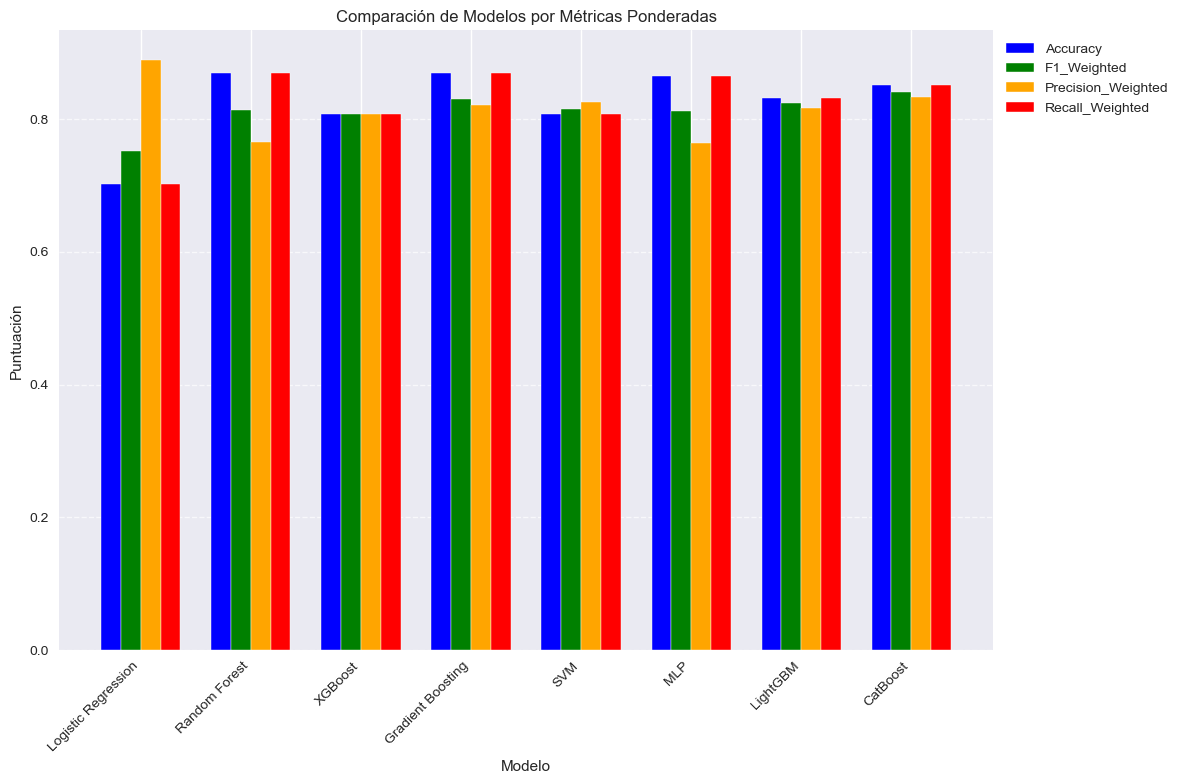

2025-06-15 23:28:29,135 - INFO - Curva ROC guardada como roc_curve_CatBoost.png


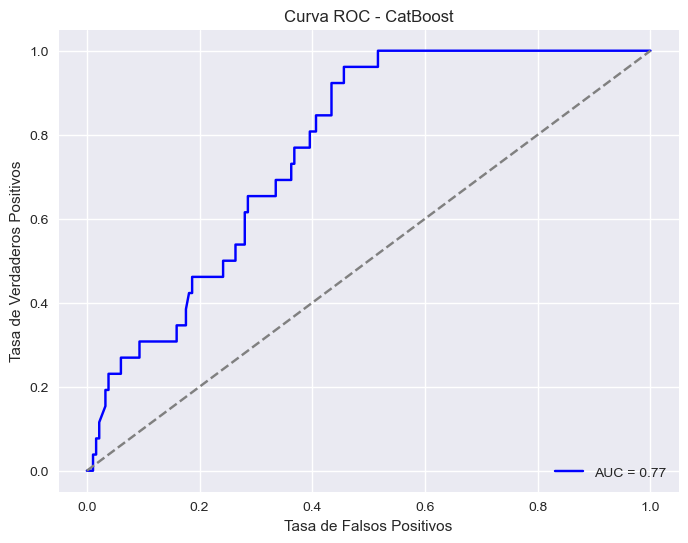

2025-06-15 23:28:29,473 - INFO - Curva Precision-Recall guardada como precision_recall_curve_CatBoost.png


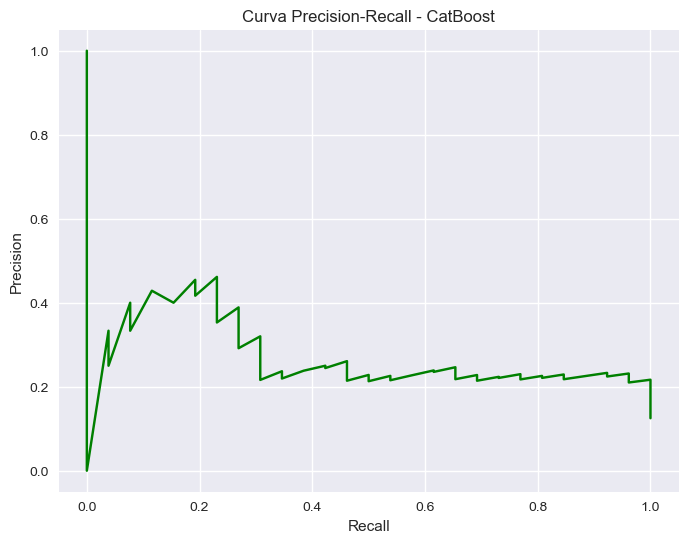

2025-06-15 23:28:29,887 - INFO - Matriz de confusión guardada como confusion_matrix_CatBoost.png


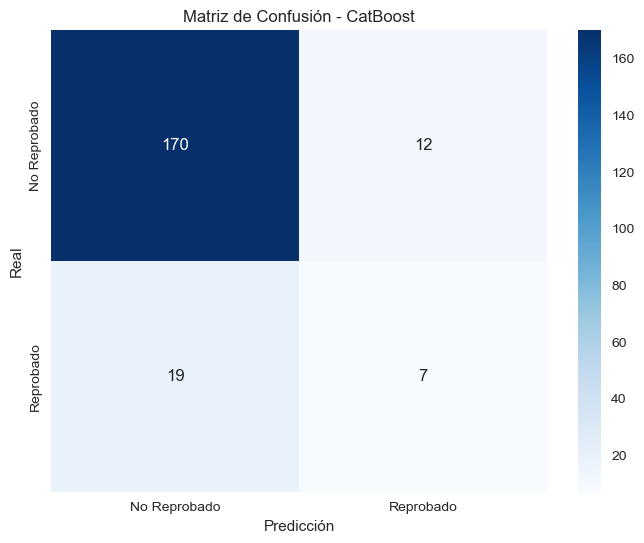

2025-06-15 23:28:30,350 - INFO - Comparación de curvas ROC guardada como roc_curves_comparison.png


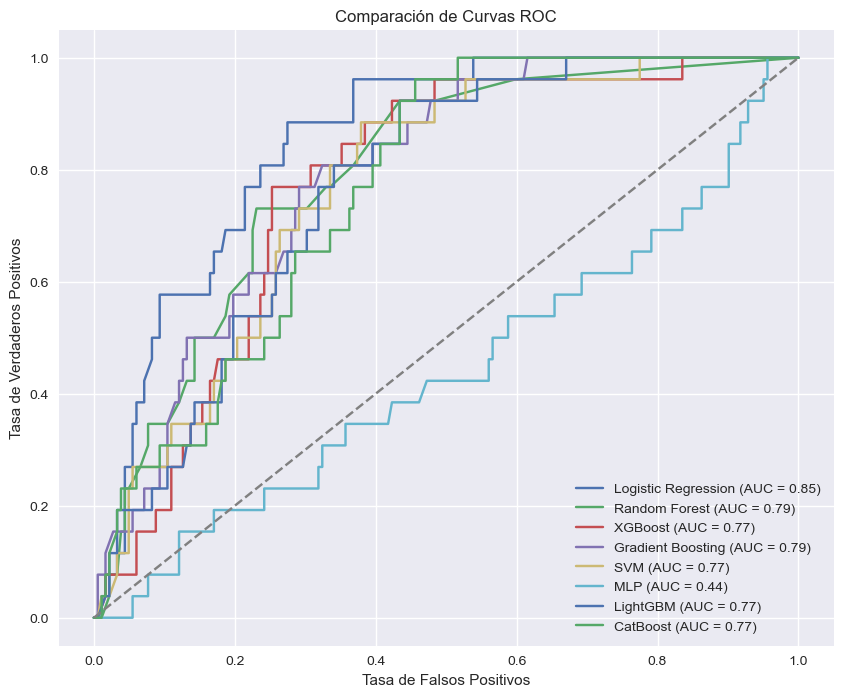

2025-06-15 23:28:30,673 - INFO - Visualizaciones generadas.
2025-06-15 23:28:30,946 - INFO - Gráfico de resultados de validación cruzada guardado como cross_validation_results.png


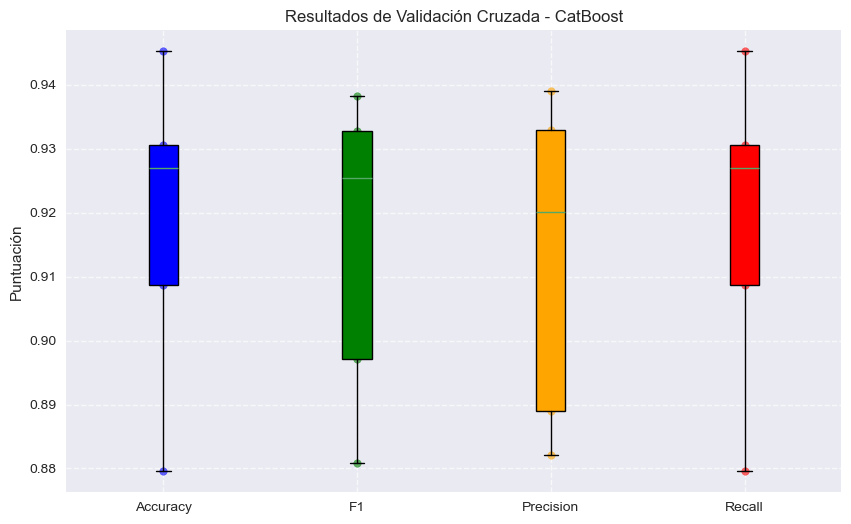

2025-06-15 23:28:31,168 - INFO - Iniciando proyección de tendencias para 3 años...
2025-06-15 23:28:31,170 - INFO - Proyectando desde 2025 hasta 2031
2025-06-15 23:28:31,174 - INFO - Año base (2024): 31 reprobados (reales)
2025-06-15 23:28:31,177 - INFO - Proyectando para el año: 2025
2025-06-15 23:28:31,179 - INFO - Iniciando creación de características...
2025-06-15 23:28:31,497 - INFO - Creación de características completada.
2025-06-15 23:28:31,540 - INFO - Año 2025: 23 reprobados (predicción)
2025-06-15 23:28:31,558 - INFO - Proyectando para el año: 2026
2025-06-15 23:28:31,561 - INFO - Iniciando creación de características...
2025-06-15 23:28:31,876 - INFO - Creación de características completada.
2025-06-15 23:28:31,917 - INFO - Año 2026: 17 reprobados (predicción)
2025-06-15 23:28:31,932 - INFO - Proyectando para el año: 2027
2025-06-15 23:28:31,935 - INFO - Iniciando creación de características...
2025-06-15 23:28:32,243 - INFO - Creación de características completada.
2025-06

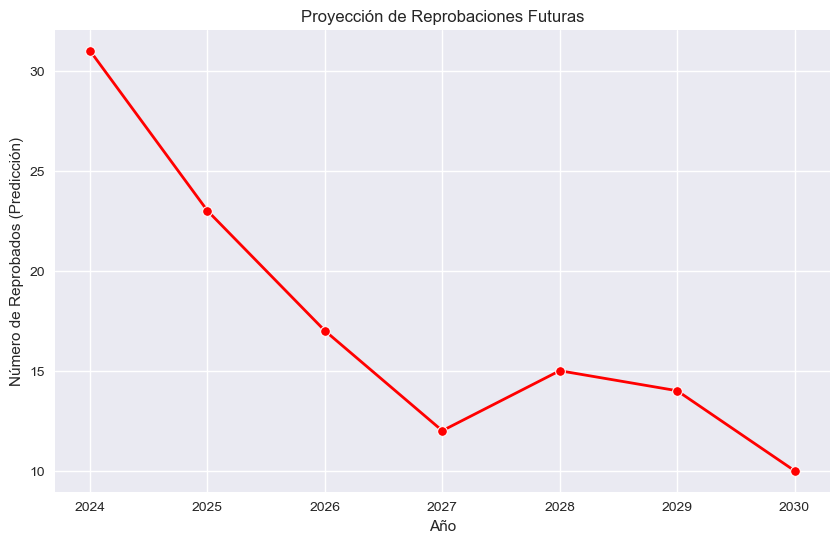

2025-06-15 23:28:33,871 - INFO - Predicciones futuras detalladas guardadas en 'predicciones_futuras_detalladas.csv'
2025-06-15 23:28:33,873 - INFO - Iniciando creación de características...
2025-06-15 23:28:34,338 - INFO - Creación de características completada.
2025-06-15 23:28:34,339 - INFO - Identificando estudiantes en riesgo para el próximo año...
2025-06-15 23:28:34,344 - INFO - Iniciando creación de características...
2025-06-15 23:28:34,676 - INFO - Creación de características completada.
2025-06-15 23:28:34,695 - INFO - Ajustando predicciones para 63 estudiantes nuevos
2025-06-15 23:28:34,703 - INFO - Distribución de niveles de riesgo:
Nivel_Riesgo
Bajo        247
Medio        13
Alto         10
Muy Alto     10
2025-06-15 23:28:34,713 - INFO - Generando visualizaciones de distribución de riesgo...
2025-06-15 23:28:34,956 - INFO - Gráfico de distribución de riesgo guardado como risk_distribution.png


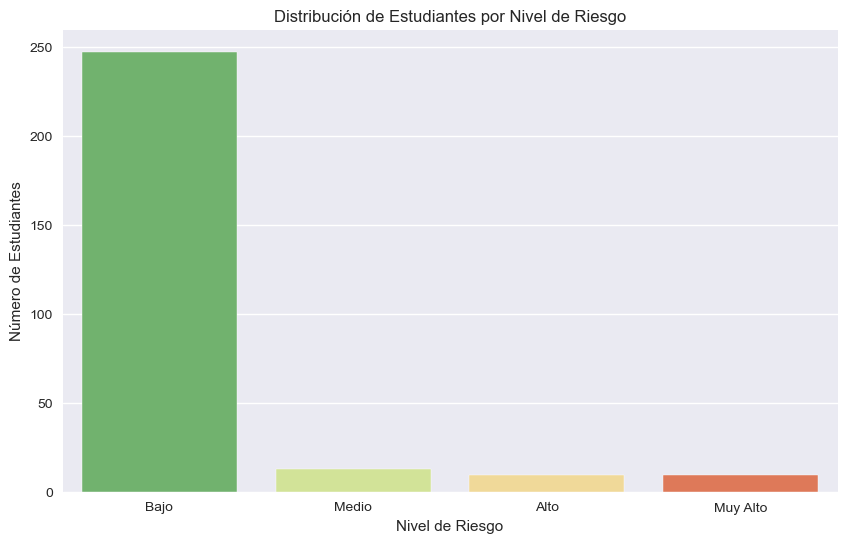

2025-06-15 23:28:35,427 - INFO - Gráfico de distribución de riesgo por género guardado como risk_distribution_gender.png


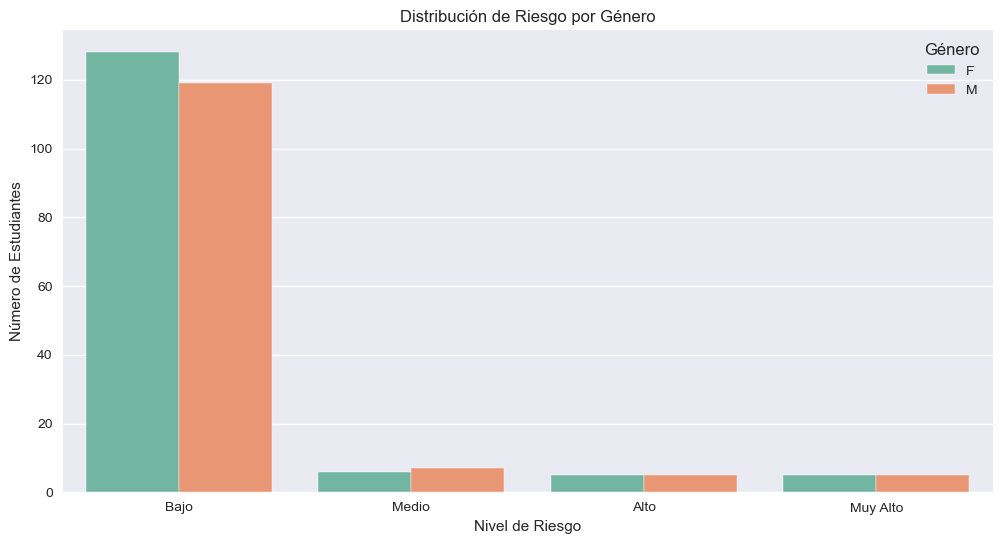

2025-06-15 23:28:36,065 - INFO - Gráfico de distribución de riesgo por nivel guardado como risk_distribution_level.png


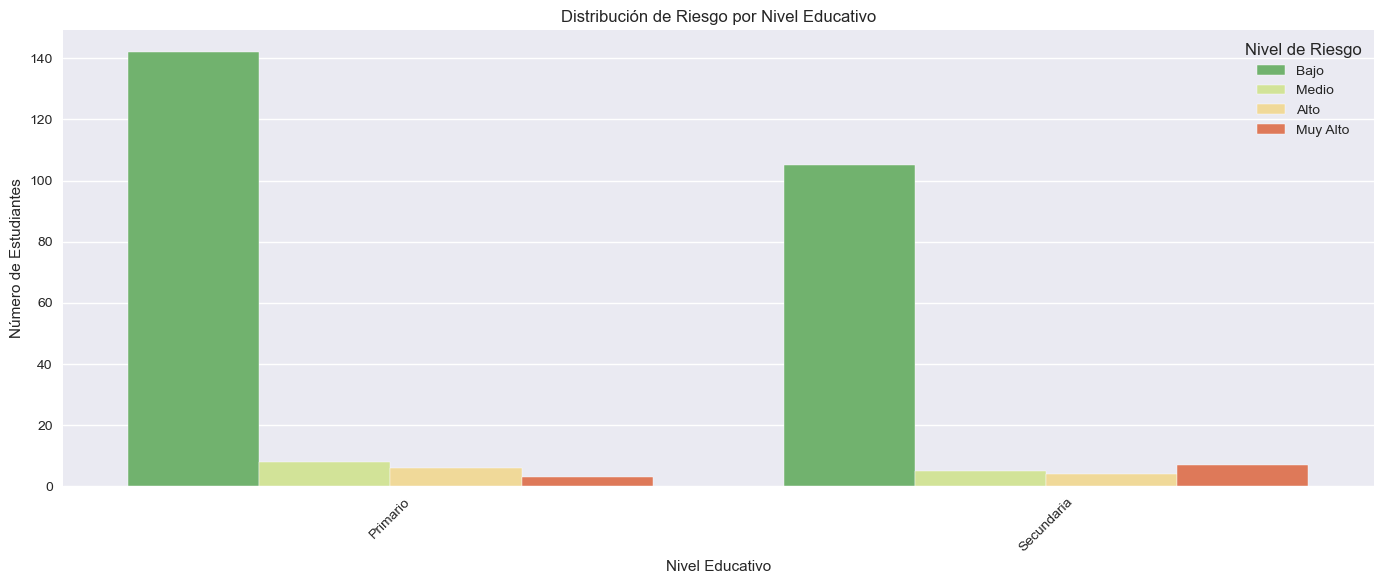

2025-06-15 23:28:36,310 - INFO - Identificación de estudiantes en riesgo completada.
2025-06-15 23:28:36,311 - INFO - Preparando perfiles de intervención para los 50 estudiantes de mayor riesgo...
2025-06-15 23:28:36,317 - INFO - Seleccionados 20 estudiantes con riesgo Alto o Muy Alto (máximo 50).
2025-06-15 23:28:36,334 - INFO - Perfiles de intervención preparados.
2025-06-15 23:28:36,336 - INFO - 
--- Resumen de Estudiantes en Riesgo (Próximo Año, Top 10) ---
2025-06-15 23:28:36,345 - INFO - 
           Codigo Rude  Probabilidad_Reprobacion Genero       Nivel  Curso  Promedio_Actual  Reprobaciones_acumuladas  Años_en_sistema  Volatilidad_rendimiento Nivel_Riesgo
2523   719500632017028                  0.993296      F  Secundaria  1ro A               68                         0                1                      0.0     Muy Alto
1347  519500012021961A                  0.981703      M    Primario  2do A               56                         0                1                    

In [93]:
# Punto de entrada del script
if __name__ == "__main__":
    main() # Usará "tabla_minable.csv" por defecto

## <b> Fase 6: </b> Despliegue

En esta fase se dan a conocer los resultados del proyecto, para lo cual se usa tableau public



## Anexos

### Extra: Buscando evolucion de los promedios de los estudiantes por año

In [84]:
df1.head()

,Gestion,Nivel,Curso,A. Paterno,A. Materno,Nombres,Codigo Rude,Genero,Fecha Nac.,Lug. Nac,...,T. General/Esp,Fisica,Quimica,Bio./C.Nat,Cosmov y,Val. Esp. Rel,Psicologia,Promedio,Año,Origen
0,2015.0,Primario,1ro A,AGUILAR,SURUBI,DAYANE PRISCILA,8196001120142086,F,2009-05-12,SC,...,71.0,NaN,NaN,75.0,NaN,79.0,NaN,78.111111,2015,Notas Primaria
1,2015.0,Primario,1ro A,BANEGAS,BLANCO,JUAN DANIEL,5195000120142681,M,2008-11-24,SC,...,58.0,NaN,NaN,57.0,NaN,52.0,NaN,60.555556,2015,Notas Primaria
2,2015.0,Primario,1ro A,BARRERO,ROJAS,LUIS DEIVY,5195000120142734,M,2009-03-06,SC,...,76.0,NaN,NaN,72.0,NaN,65.0,NaN,76.888889,2015,Notas Primaria
3,2015.0,Primario,1ro A,BECKMANN,MAMANI,ANDRES,8098050820131175,M,2008-11-13,CBB,...,81.0,NaN,NaN,86.0,NaN,89.0,NaN,86.111111,2015,Notas Primaria
4,2015.0,Primario,1ro A,BEJARANO,CONDORI,ADRIANA,719500632014275,F,2008-12-28,SC,...,75.0,NaN,NaN,79.0,NaN,75.0,NaN,77.222222,2015,Notas Primaria



--- Menú ---
1. Consulta
2. Salir


Ingrese la opción deseada (1 o 2):  1
Ingrese el nombre del estudiante:  Santiago


Se encontraron múltiples estudiantes con ese nombre. Por favor, seleccione el número de la opción deseada:
1. Nombre Completo: SANTIAGO ALEXANDER CASTEDO POCIABO, Codigo Rude: 719500332019001
2. Nombre Completo: SANTIAGO ARATEA VELASQUEZ, Codigo Rude: 519500012019026
3. Nombre Completo: SANTIAGO BARRIENTOS RIVERO, Codigo Rude: 5195000120226866
4. Nombre Completo: SANTIAGO JUSTINIANO NOGALES, Codigo Rude: 519500012018023
5. Nombre Completo: SANTIAGO URQUIZA LOPEZ, Codigo Rude: 519500012013709


Ingrese el número de la opción deseada:  4



Datos del estudiante seleccionado:
Nombre Completo: SANTIAGO JUSTINIANO NOGALES
Codigo Rude: 519500012018023

Promedios del estudiante por año:
  Año: 2019.0, Promedio: 67.88888888888889, Curso: 1ro B, Nivel: Primario
  Año: 2020.0, Promedio: 66.55555555555556, Curso: 2do B, Nivel: Primario
  Año: 2021.0, Promedio: 61.22222222222222, Curso: 3ro B, Nivel: Primario
  Año: 2022.0, Promedio: 52.0, Curso: 4to A, Nivel: Primario
  Año: 2023.0, Promedio: 61.66666666666666, Curso: 4to A, Nivel: Primario
  Año: 2024.0, Promedio: 57.22222222222222, Curso: 5to A, Nivel: Primario


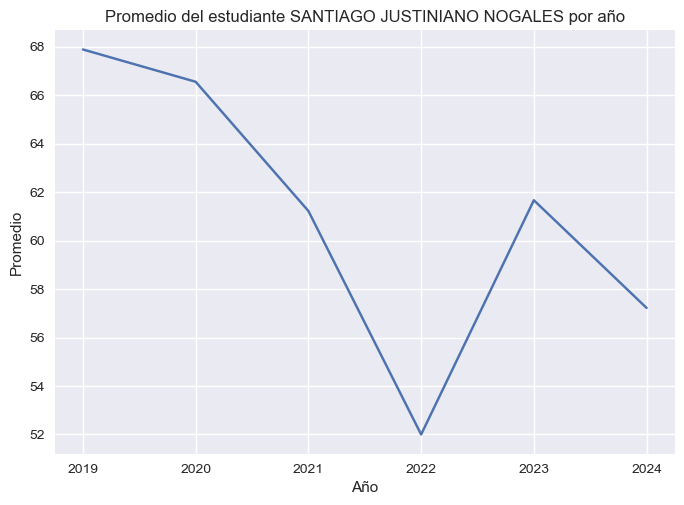


--- Menú ---
1. Consulta
2. Salir


Ingrese la opción deseada (1 o 2):  2


Saliendo del programa.


In [89]:
## Calcular el promedio por estudiante y año
promedios_por_estudiante_anio = df1.groupby(['Codigo Rude', 'Gestion'])['Promedio'].mean().reset_index()

# Crear el campo 'Nombre_Completo' concatenando los otros campos
df1['Nombre_Completo'] = df1['Nombres'] + ' ' + df1['A. Paterno'] + ' ' + df1['A. Materno']

def consultar_estudiante_por_nombre():
    """Permite al usuario consultar la información de un estudiante por Nombre Completo,
    seleccionando de una lista numerada de nombres únicos.
    """
    try:
        nombre_a_buscar = input("Ingrese el nombre del estudiante: ")

        # Filtrar el DataFrame para obtener los estudiantes con ese nombre
        estudiantes_con_ese_nombre = df1[df1['Nombre_Completo'].str.contains(nombre_a_buscar, case=False, na=False)]

        if not estudiantes_con_ese_nombre.empty:
            # Obtener nombres completos únicos y su Codigo Rude asociado
            nombres_unicos = estudiantes_con_ese_nombre.groupby(['Nombre_Completo', 'Codigo Rude']).size().reset_index(name='count')

            if len(nombres_unicos) > 1:
                print("Se encontraron múltiples estudiantes con ese nombre. Por favor, seleccione el número de la opción deseada:")
                for index, row in nombres_unicos.iterrows():
                    print(f"{index + 1}. Nombre Completo: {row['Nombre_Completo']}, Codigo Rude: {row['Codigo Rude']}")

                seleccion = int(input("Ingrese el número de la opción deseada: ")) - 1

                if 0 <= seleccion < len(nombres_unicos):
                    codigo_estudiante_seleccionado = nombres_unicos.iloc[seleccion]['Codigo Rude']
                    nombre_completo_seleccionado = nombres_unicos.iloc[seleccion]['Nombre_Completo']
                else:
                    print("Opción no válida. Por favor, seleccione un número de la lista.")
                    return
            elif len(nombres_unicos) == 1:
                codigo_estudiante_seleccionado = nombres_unicos.iloc[0]['Codigo Rude']
                nombre_completo_seleccionado = nombres_unicos.iloc[0]['Nombre_Completo']
            else:
                print("No se encontraron estudiantes con ese nombre.")
                return
        else:
            print("No se encontraron estudiantes con ese nombre.")
            return

        # Mostrar los datos del estudiante seleccionado antes de los promedios
        print(f"\nDatos del estudiante seleccionado:")
        print(f"Nombre Completo: {nombre_completo_seleccionado}")
        print(f"Codigo Rude: {codigo_estudiante_seleccionado}")

        # Filtrar promedios para el estudiante seleccionado
        promedios_estudiante_especifico = promedios_por_estudiante_anio[promedios_por_estudiante_anio['Codigo Rude'] == codigo_estudiante_seleccionado]

        # Imprimir los promedios del estudiante específico, incluyendo Curso y Nivel
        print("\nPromedios del estudiante por año:")
        for index, row in promedios_estudiante_especifico.iterrows():
            #  Obtener Curso y Nivel del DataFrame original 'df'
            curso_nivel = df1[(df1['Codigo Rude'] == codigo_estudiante_seleccionado) & (df1['Gestion'] == row['Gestion'])][['Curso', 'Nivel']]
            if not curso_nivel.empty:
                curso = curso_nivel.iloc[0]['Curso']
                nivel = curso_nivel.iloc[0]['Nivel']
                print(f"  Año: {row['Gestion']}, Promedio: {row['Promedio']}, Curso: {curso}, Nivel: {nivel}")
            else:
                print(f"  Año: {row['Gestion']}, Promedio: {row['Promedio']}, Curso: Desconocido, Nivel: Desconocido")


        # Visualización para el estudiante específico
        plt.plot(promedios_estudiante_especifico['Gestion'], promedios_estudiante_especifico['Promedio'])
        plt.xlabel('Año')
        plt.ylabel('Promedio')
        plt.title(f"Promedio del estudiante {nombre_completo_seleccionado} por año")
        plt.show()

    except Exception as e:
        print(f"Ocurrió un error durante la consulta: {e}")

# --- Bucle Principal del Programa ---
while True:
    print("\n--- Menú ---")
    print("1. Consulta")
    print("2. Salir")

    opcion = input("Ingrese la opción deseada (1 o 2): ")

    if opcion == "1":
        consultar_estudiante_por_nombre()
    elif opcion == "2":
        print("Saliendo del programa.")
        break  # Sale del bucle while
    else:
        print("Opción no válida. Por favor, ingrese 1 o 2.")

### Anexo 3: Predicción de cantidad de estudiantes en los siguientes años

In [86]:
!pip install pmdarima

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

def cargar_y_preparar_datos(ruta_archivo='./Salidas del programa/calificaciones.xlsx'):
    """Carga y prepara los datos para el análisis predictivo."""
    try:
        # Cargar datos
        df_calificaciones = pd.read_excel(ruta_archivo)

        # Detectar columnas clave
        cols_gestion = ['gestion', 'año', 'anio', 'periodo', 'gestión']
        cols_rude = ['rude', 'Codigo Rude', 'estudiante', 'alumno', 'codigo']

        columna_gestion = next((col for col in df_calificaciones.columns
                              if any(key in col.lower() for key in cols_gestion)), None)

        columna_rude = next((col for col in df_calificaciones.columns
                           if any(key in col.lower() for key in cols_rude)), None)

        if not columna_gestion or not columna_rude:
            raise ValueError("No se encontraron las columnas necesarias")

        # Agrupar por gestión y contar estudiantes únicos
        df = df_calificaciones.groupby(columna_gestion)[columna_rude].nunique().reset_index()
        df.columns = ['Gestion', 'Cantidad_Estudiantes']

        # Asegurar tipo de datos correcto
        df['Gestion'] = pd.to_numeric(df['Gestion'], errors='coerce')
        df = df.dropna().reset_index(drop=True)

        # Ordenar por gestión
        df = df.sort_values('Gestion').reset_index(drop=True)

        # Detectar y eliminar outliers usando IQR
        Q1 = df['Cantidad_Estudiantes'].quantile(0.25)
        Q3 = df['Cantidad_Estudiantes'].quantile(0.75)
        IQR = Q3 - Q1

        # Filtrar outliers extremos (3*IQR)
        df_limpio = df[(df['Cantidad_Estudiantes'] >= Q1 - 3*IQR) &
                      (df['Cantidad_Estudiantes'] <= Q3 + 3*IQR)].reset_index(drop=True)

        # Si se eliminaron muchos datos, usar el original
        if len(df_limpio) < len(df) * 0.7:
            print("Se detectaron muchos outliers. Usando datos originales.")
            df_limpio = df
        else:
            print(f"Se eliminaron {len(df) - len(df_limpio)} outliers.")

        return df_limpio

    except Exception as e:
        print(f"Error al cargar datos: {e}")
        return None

def dividir_datos(df, test_size=0.3):
    """Divide los datos respetando la secuencia temporal."""
    n = len(df)
    train_size = max(int(n * (1-test_size)), n-2)
    df_train = df.iloc[:train_size].reset_index(drop=True)
    df_test = df.iloc[train_size:].reset_index(drop=True)
    return df_train, df_test

def evaluar_y_entrenar_modelos(df_train, df_test):
    """Entrena múltiples modelos y evalúa su rendimiento."""
    # Preparar datos
    y_train = df_train['Cantidad_Estudiantes'].values
    y_test = df_test['Cantidad_Estudiantes'].values

    # Resultados y modelos
    resultados = {}
    modelos = {}

    # 1. Suavizado Exponencial Simple
    try:
        # Optimizar alpha con grid search
        best_alpha = 0.1
        best_rmse = float('inf')

        for alpha in np.linspace(0.05, 0.95, 19):
            modelo = SimpleExpSmoothing(y_train).fit(smoothing_level=alpha, optimized=False)
            y_pred = modelo.forecast(len(y_test))
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))

            if rmse < best_rmse:
                best_rmse = rmse
                best_alpha = alpha

        # Entrenar con el mejor alpha
        modelo_ses = SimpleExpSmoothing(y_train).fit(smoothing_level=best_alpha, optimized=False)
        y_pred = modelo_ses.forecast(len(y_test))

        # Evaluar
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred) if len(y_test) > 1 else 0

        resultados['SES'] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R²': r2}
        modelos['SES'] = {'modelo': modelo_ses, 'params': {'alpha': best_alpha}}

    except Exception as e:
        print(f"Error en SES: {e}")

    # 2. Holt-Winters (Suavizado Exponencial con Tendencia)
    try:
        # Grid search para parámetros
        best_params = {'trend': None, 'alpha': 0.1, 'beta': 0.1}
        best_rmse = float('inf')

        for trend in ['add', 'mul']:
            for alpha in [0.1, 0.3, 0.5, 0.7, 0.9]:
                for beta in [0.1, 0.3, 0.5, 0.7, 0.9]:
                    try:
                        modelo = ExponentialSmoothing(
                            y_train, trend=trend, seasonal=None
                        ).fit(smoothing_level=alpha, smoothing_trend=beta)

                        y_pred = modelo.forecast(len(y_test))
                        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

                        if rmse < best_rmse:
                            best_rmse = rmse
                            best_params = {'trend': trend, 'alpha': alpha, 'beta': beta}
                    except:
                        continue

        # Entrenar con los mejores parámetros
        modelo_hw = ExponentialSmoothing(
            y_train, trend=best_params['trend'], seasonal=None
        ).fit(smoothing_level=best_params['alpha'], smoothing_trend=best_params['beta'])

        y_pred = modelo_hw.forecast(len(y_test))

        # Evaluar
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred) if len(y_test) > 1 else 0

        resultados['Holt'] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R²': r2}
        modelos['Holt'] = {'modelo': modelo_hw, 'params': best_params}

    except Exception as e:
        print(f"Error en Holt-Winters: {e}")

    # 3. SARIMA simple pero efectivo
    try:
        best_order = (1, 0, 0)
        best_rmse = float('inf')

        # Grid search simplificado
        for p in range(3):
            for d in range(2):
                for q in range(2):
                    try:
                        modelo = SARIMAX(y_train, order=(p, d, q), simple_differencing=True)
                        res = modelo.fit(disp=False)
                        y_pred = res.forecast(len(y_test))
                        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

                        if rmse < best_rmse:
                            best_rmse = rmse
                            best_order = (p, d, q)
                    except:
                        continue

        # Entrenar con los mejores parámetros
        modelo_sarima = SARIMAX(y_train, order=best_order, simple_differencing=True)
        res_sarima = modelo_sarima.fit(disp=False)
        y_pred = res_sarima.forecast(len(y_test))

        # Evaluar
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred) if len(y_test) > 1 else 0

        resultados['SARIMA'] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R²': r2}
        modelos['SARIMA'] = {'modelo': res_sarima, 'params': {'order': best_order}}

    except Exception as e:
        print(f"Error en SARIMA: {e}")

    # 4. Método de crecimiento medio
    try:
        # Calcular tasas de crecimiento
        crecimientos = []
        for i in range(1, len(y_train)):
            if y_train[i-1] > 0:  # Evitar división por cero
                crecimiento = (y_train[i] / y_train[i-1]) - 1
                crecimientos.append(crecimiento)

        # Crecimiento medio
        if crecimientos:
            crecimiento_medio = np.median(crecimientos)  # Mediana para robustez

            # Predecir con crecimiento medio
            y_pred = []
            valor_actual = y_train[-1]

            for _ in range(len(y_test)):
                valor_actual = valor_actual * (1 + crecimiento_medio)
                y_pred.append(valor_actual)

            y_pred = np.array(y_pred)

            # Evaluar
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred) if len(y_test) > 1 else 0

            resultados['Crecimiento'] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R²': r2}
            modelos['Crecimiento'] = {'modelo': {'crecimiento': crecimiento_medio, 'ultimo': y_train[-1]}}

    except Exception as e:
        print(f"Error en modelo de crecimiento: {e}")

    # 5. Media Móvil Ponderada (implementación propia)
    try:
        # Diferentes configuraciones de pesos
        configs = [
            [0.7, 0.2, 0.1],  # Más peso reciente
            [0.6, 0.3, 0.1],
            [0.5, 0.3, 0.2],
            [0.4, 0.3, 0.3],
            [0.33, 0.33, 0.34]  # Pesos iguales
        ]

        best_weights = None
        best_rmse = float('inf')

        for weights in configs:
            # Ajustar longitud de pesos si es necesario
            w = weights[:min(len(weights), len(y_train))]
            if len(w) < len(y_train):
                w = w + [0] * (len(y_train) - len(w))

            # Normalizar pesos
            w = np.array(w) / sum(w)

            # Invertir para dar más peso a datos recientes
            w = w[::-1]

            # Calcular predicción ponderada
            pred = np.sum(y_train[-len(w):] * w)

            # Predecir para test (valor constante)
            y_pred = np.array([pred] * len(y_test))

            # Evaluar
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))

            if rmse < best_rmse:
                best_rmse = rmse
                best_weights = w

        # Usar los mejores pesos
        pred = np.sum(y_train[-len(best_weights):] * best_weights)
        y_pred = np.array([pred] * len(y_test))

        # Evaluar
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred) if len(y_test) > 1 else 0

        resultados['MediaMovil'] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R²': r2}
        modelos['MediaMovil'] = {'modelo': {'weights': best_weights, 'valores': y_train[-len(best_weights):]}}

    except Exception as e:
        print(f"Error en Media Móvil: {e}")

    # Convertir resultados a DataFrame y ordenar por RMSE
    if resultados:
        df_resultados = pd.DataFrame(columns=['Modelo', 'MSE', 'RMSE', 'MAE', 'R²'])

        for modelo, metricas in resultados.items():
            nueva_fila = pd.DataFrame({
                'Modelo': [modelo],
                'MSE': [metricas['MSE']],
                'RMSE': [metricas['RMSE']],
                'MAE': [metricas['MAE']],
                'R²': [metricas['R²']]
            })
            df_resultados = pd.concat([df_resultados, nueva_fila], ignore_index=True)

        df_resultados = df_resultados.sort_values('RMSE').reset_index(drop=True)

        # Mejor modelo
        mejor_modelo = df_resultados.iloc[0]['Modelo']

        return df_resultados, modelos, mejor_modelo
    else:
        return None, None, None

Se eliminaron 0 outliers.

🏆 El mejor modelo según RMSE es: Holt

📊 Métricas de todos los modelos:
        Modelo         MSE       RMSE        MAE         R²
0         Holt   13.053520   3.612966   3.545193   0.568479
1   MediaMovil   30.610000   5.532630   5.500000  -0.011901
2          SES   32.267219   5.680424   5.500000  -0.066685
3       SARIMA   52.740191   7.262244   5.595218  -0.743477
4  Crecimiento  695.991304  26.381647  24.513430 -22.007977

🔮 Predicciones para los próximos 5 años:
    Año  SES  Holt  SARIMA  Crecimiento  MediaMovil  MEJOR MODELO
0  2025  308   316     305          303         307           316
1  2026  308   320     305          294         307           320
2  2027  308   325     305          285         307           325
3  2028  308   329     304          277         307           329
4  2029  308   333     304          268         307           333
5  2030  308   338     304          260         307           338

📑 Se ha guardado el archivo consolid

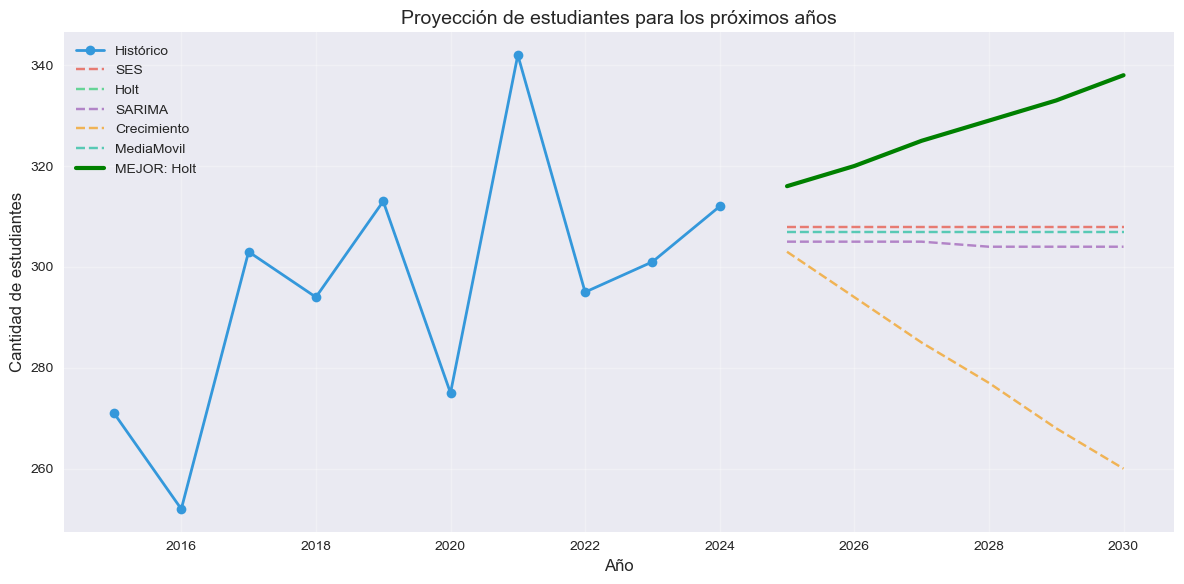

In [88]:
def generar_predicciones_futuras(df, modelos, mejor_modelo, años_a_predecir=3):
    """Genera predicciones para los próximos años con todos los modelos e incluye datos históricos."""
    ultimo_año = df['Gestion'].max()
    años_futuros = np.array([ultimo_año + i for i in range(1, años_a_predecir+1)])

    # Crear un DataFrame consolidado que incluirá datos históricos y predicciones
    consolidado_df = pd.DataFrame({'Año': list(df['Gestion']) + list(años_futuros)})

    # Añadir datos históricos
    consolidado_df['Histórico'] = list(df['Cantidad_Estudiantes']) + [None] * años_a_predecir

    # DataFrame solo para predicciones futuras (para mantener la funcionalidad original)
    predicciones_df = pd.DataFrame({'Año': años_futuros})

    # Series completas para reentrenamiento
    y_completo = df['Cantidad_Estudiantes'].values

    for nombre, info in modelos.items():
        try:
            if nombre == 'SES':
                # Reentrenar con todos los datos
                modelo = SimpleExpSmoothing(y_completo).fit(
                    smoothing_level=info['params']['alpha'], optimized=False)
                pred = modelo.forecast(años_a_predecir)

            elif nombre == 'Holt':
                # Reentrenar con todos los datos
                modelo = ExponentialSmoothing(
                    y_completo, trend=info['params']['trend'], seasonal=None
                ).fit(
                    smoothing_level=info['params']['alpha'],
                    smoothing_trend=info['params']['beta']
                )
                pred = modelo.forecast(años_a_predecir)

            elif nombre == 'SARIMA':
                # Reentrenar con todos los datos
                order = info['params']['order']
                modelo = SARIMAX(y_completo, order=order, simple_differencing=True)
                res = modelo.fit(disp=False)
                pred = res.forecast(años_a_predecir)

            elif nombre == 'Crecimiento':
                # Usar tasa de crecimiento medio
                crecimiento = info['modelo']['crecimiento']
                ultimo = y_completo[-1]

                pred = []
                valor_actual = ultimo

                for _ in range(años_a_predecir):
                    valor_actual = valor_actual * (1 + crecimiento)
                    pred.append(valor_actual)

                pred = np.array(pred)

            elif nombre == 'MediaMovil':
                # Aplicar pesos a los últimos valores
                weights = info['modelo']['weights']
                valores = y_completo[-len(weights):]

                # Mismo valor para todos los años (predicción constante)
                valor_pred = np.sum(valores * weights)
                pred = np.array([valor_pred] * años_a_predecir)

            # Convertir a enteros positivos
            pred = np.maximum(0, np.round(pred)).astype(int)

            # Agregar a predicciones futuras
            predicciones_df[nombre] = pred

            # Agregar al consolidado (datos históricos más predicciones)
            # Para los valores históricos, usar None
            consolidado_df[nombre] = [None] * len(df) + list(pred)

        except Exception as e:
            print(f"Error al predecir con {nombre}: {e}")
            predicciones_df[nombre] = np.nan
            consolidado_df[nombre] = [None] * len(consolidado_df)

    # Añadir columna del mejor modelo
    if mejor_modelo in predicciones_df.columns:
        predicciones_df['MEJOR MODELO'] = predicciones_df[mejor_modelo]
        consolidado_df['MEJOR MODELO'] = [None] * len(df) + list(predicciones_df[mejor_modelo])

    return predicciones_df, años_futuros, consolidado_df

def visualizar_resultados(df, predicciones_df, mejor_modelo, consolidado_df=None):
    """Crea visualizaciones de los datos históricos y predicciones."""
    # Configuración de estilos
    plt.style.use('seaborn-v0_8')

    # Gráfico comparativo de todos los modelos
    fig, ax = plt.subplots(figsize=(12, 6))

    # Datos históricos
    ax.plot(df['Gestion'], df['Cantidad_Estudiantes'], 'o-',
            label="Histórico", linewidth=2, color='#3498db')

    # Predicciones de cada modelo
    paleta = ['#e74c3c', '#2ecc71', '#9b59b6', '#f39c12', '#1abc9c']

    i = 0
    for modelo in predicciones_df.columns:
        if modelo not in ['Año', 'MEJOR MODELO']:
            color = paleta[i % len(paleta)]
            ax.plot(predicciones_df['Año'], predicciones_df[modelo], '--',
                     label=f"{modelo}", color=color, alpha=0.7)
            i += 1

    # Destacar el mejor modelo
    if mejor_modelo in predicciones_df.columns:
        ax.plot(predicciones_df['Año'], predicciones_df[mejor_modelo], '-',
                 linewidth=3, color='green', label=f"MEJOR: {mejor_modelo}")

    # Estilizar gráfico
    ax.set_title("Proyección de estudiantes para los próximos años", fontsize=14)
    ax.set_xlabel("Año", fontsize=12)
    ax.set_ylabel("Cantidad de estudiantes", fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='best')
    plt.tight_layout()

    # Guardar el gráfico
    plt.savefig('../Gráficos/Salida del código/proyeccion_estudiantes_optimizada.png', dpi=300)

    return plt

def main(ruta_archivo='./Salidas del programa/calificaciones.xlsx'):
    """Función principal que ejecuta todo el proceso."""
    # 1. Cargar y preparar datos
    df = cargar_y_preparar_datos(ruta_archivo)
    if df is None or len(df) < 3:
        print("No hay suficientes datos para continuar.")
        return None

    # 2. Dividir datos para validación
    df_train, df_test = dividir_datos(df, test_size=0.3)

    # 3. Entrenar y evaluar modelos
    metricas_df, modelos, mejor_modelo = evaluar_y_entrenar_modelos(df_train, df_test)

    # 4. Generar predicciones futuras
    predicciones_df, años_futuros, consolidado_df = generar_predicciones_futuras(df, modelos, mejor_modelo, años_a_predecir=6)

    # 5. Visualizar resultados
    visualizar_resultados(df, predicciones_df, mejor_modelo, consolidado_df)

    # 6. Guardar resultados
    metricas_df.to_csv('./Salidas del programa/metricas_modelos_optimizados.csv', index=False)
    predicciones_df.to_csv('./Salidas del programa/predicciones_estudiantes_optimizadas.csv', index=False)

    # Guardar el DataFrame consolidado con históricos y predicciones
    consolidado_df.to_csv('./Salidas del programa/historico_y_predicciones_estudiantes.csv', index=False)

    # 7. Mostrar resultados
    print(f"\n🏆 El mejor modelo según RMSE es: {mejor_modelo}")
    print("\n📊 Métricas de todos los modelos:")
    print(metricas_df)
    print("\n🔮 Predicciones para los próximos 5 años:")
    print(predicciones_df)
    print("\n📑 Se ha guardado el archivo consolidado con datos históricos y predicciones")
    print("   en: 'historico_y_predicciones_estudiantes.csv'")

    return df, modelos, metricas_df, predicciones_df, consolidado_df

if __name__ == "__main__":
    resultado = main()